In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
vehicle_df = pd.read_csv("vehicle.csv")

In [5]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [6]:
vehicle_df.shape

(846, 19)

In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

hollows_ratio, max.length_rectangularity, max.length_aspect_ratio, compactness, class are attributes with no missing values.

In [9]:
vehicle_df= vehicle_df.fillna(value= vehicle_df.median())

In [10]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [11]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

###### All the columns are in integer & float data types which typically represents no other symbols present in the data. 

In [13]:
vehicle_df.groupby(['class']).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          218                   218           218   
car            429          429                   429           429   
van            199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     218                      218            218   
car                     429                      429            429   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     218                        218   
car              429                     429                        429   
van              199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        218   
car                429                429                        429   
van                199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            218             218               218   
car                            429             429               429   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 429            429  
van                 199            199

Car class is over represtative than other two classes(Van & bus). 
This might be because of two different cars(as mentioned in the problem description) were given as one single(car) category.

In [14]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [15]:
vehicle_df.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

In [16]:
vehicle_df.kurtosis()

compactness                    -0.535275
circularity                    -0.910125
distance_circularity           -0.967704
radius_ratio                    0.329029
pr.axis_aspect_ratio           29.968642
max.length_aspect_ratio        58.375455
scatter_ratio                  -0.613414
elongatedness                  -0.864475
pr.axis_rectangularity         -0.379654
max.length_rectangularity      -0.770098
scaled_variance                 0.131983
scaled_variance.1              -0.196110
scaled_radius_of_gyration      -0.490306
scaled_radius_of_gyration.1    11.526959
skewness_about                  0.117607
skewness_about.1               -0.140974
skewness_about.2               -0.585847
hollows_ratio                  -0.813435
dtype: float64

In [17]:
col = pd.Series(vehicle_df.select_dtypes(include= ['int64', 'float64']).columns)

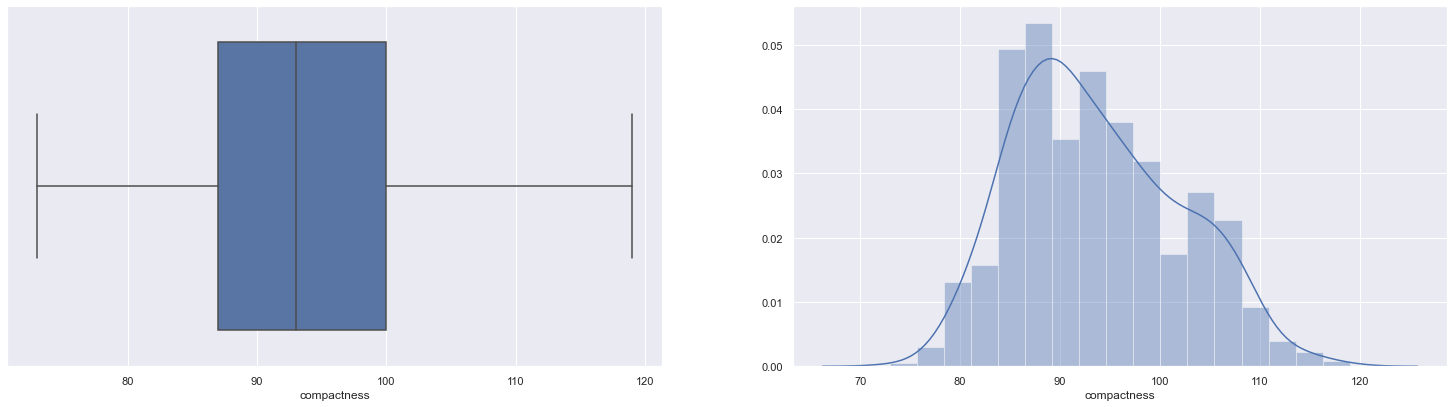

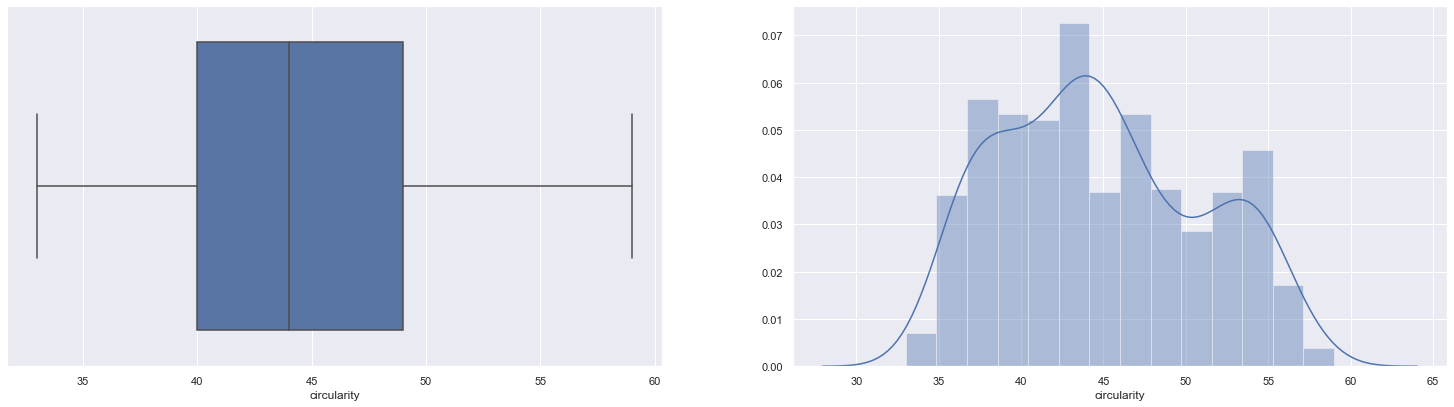

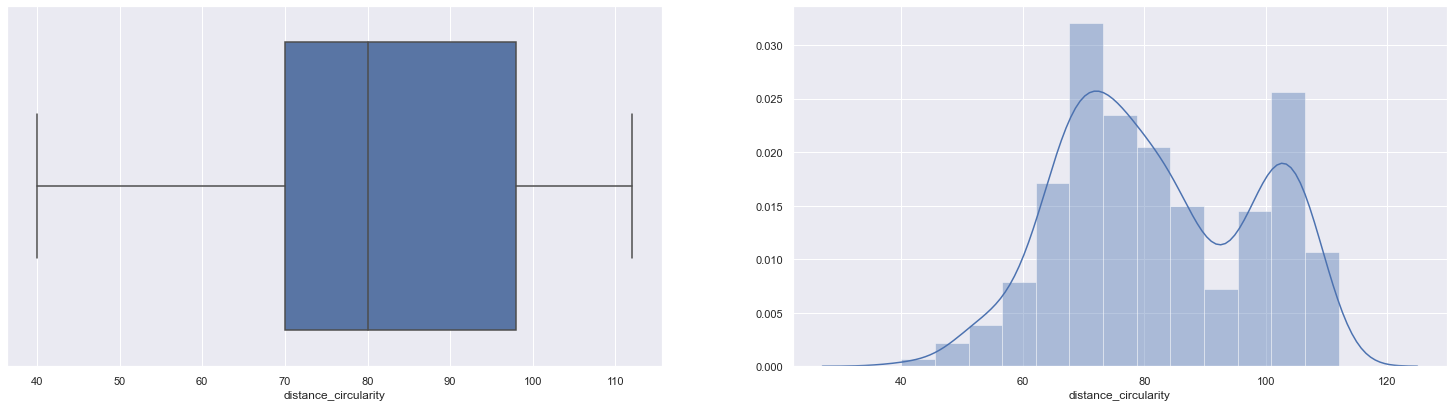

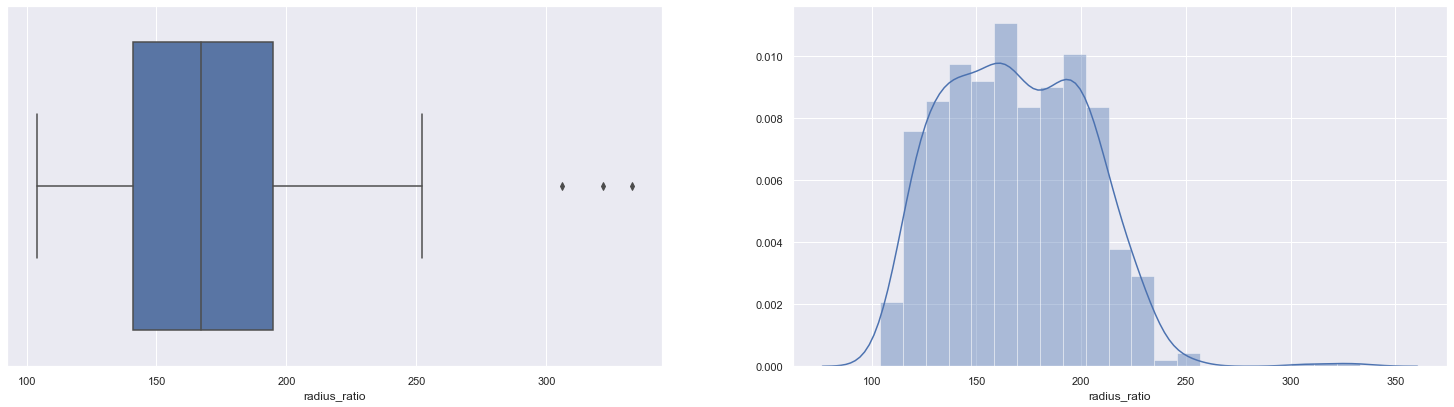

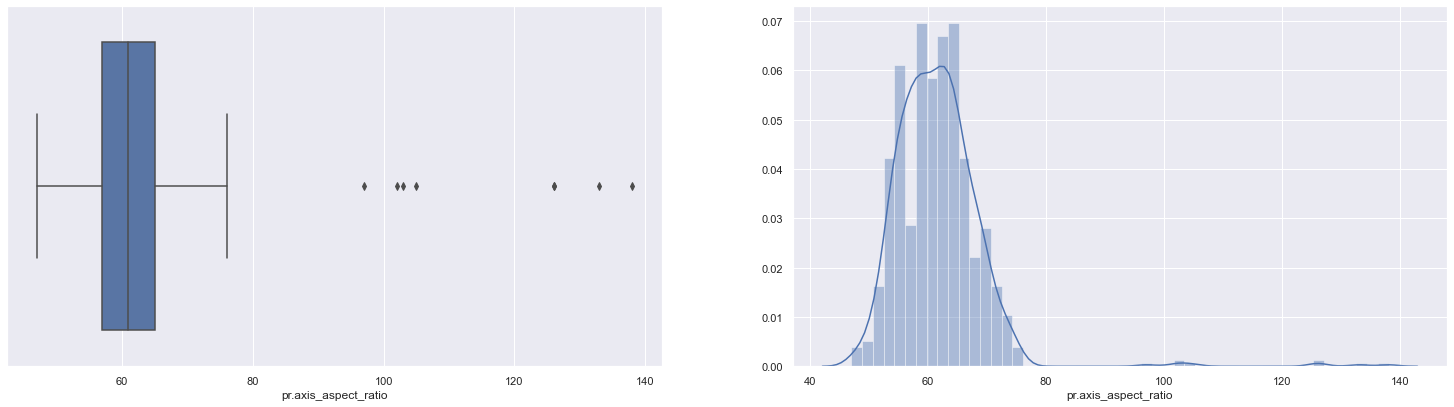

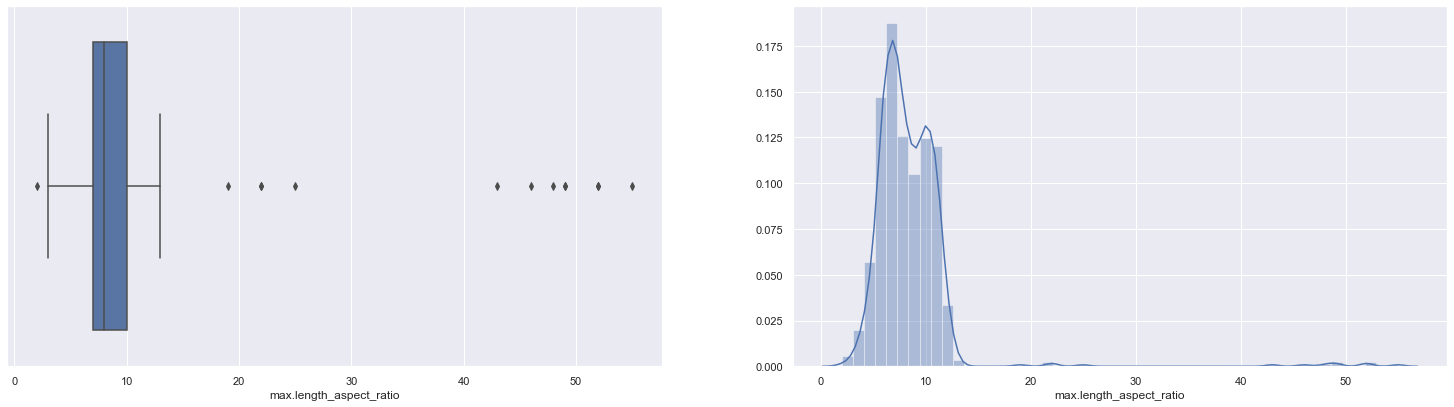

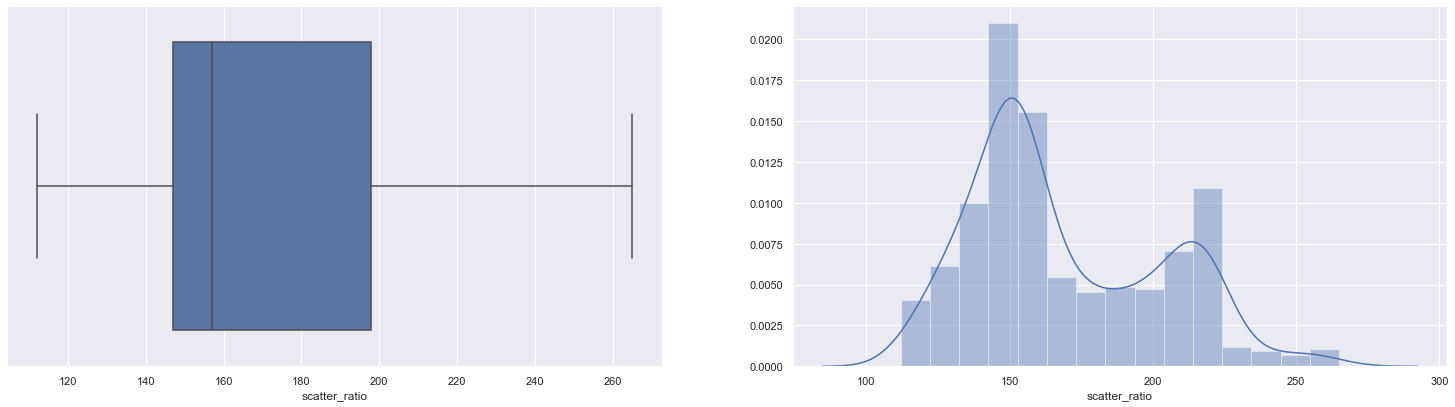

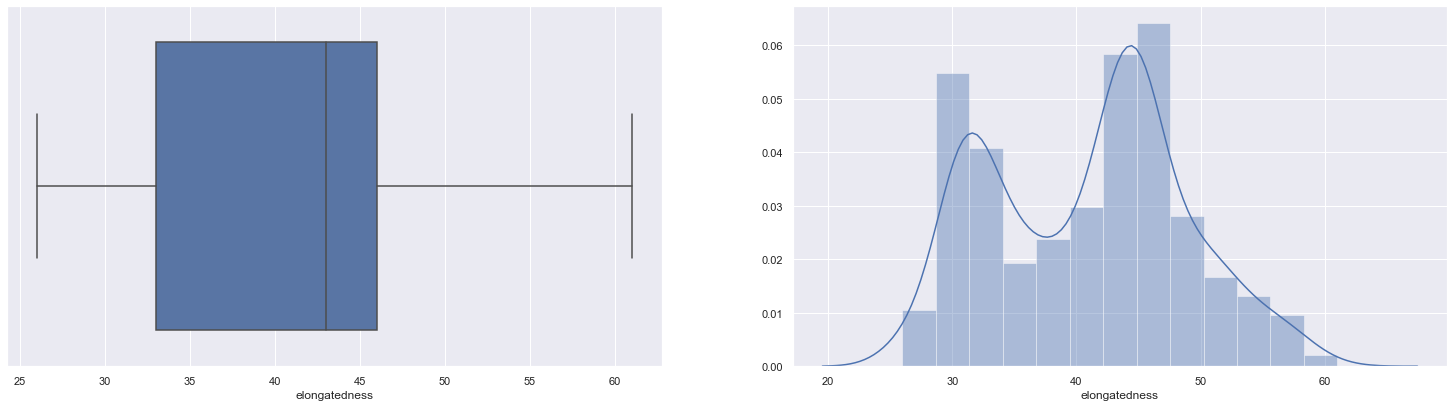

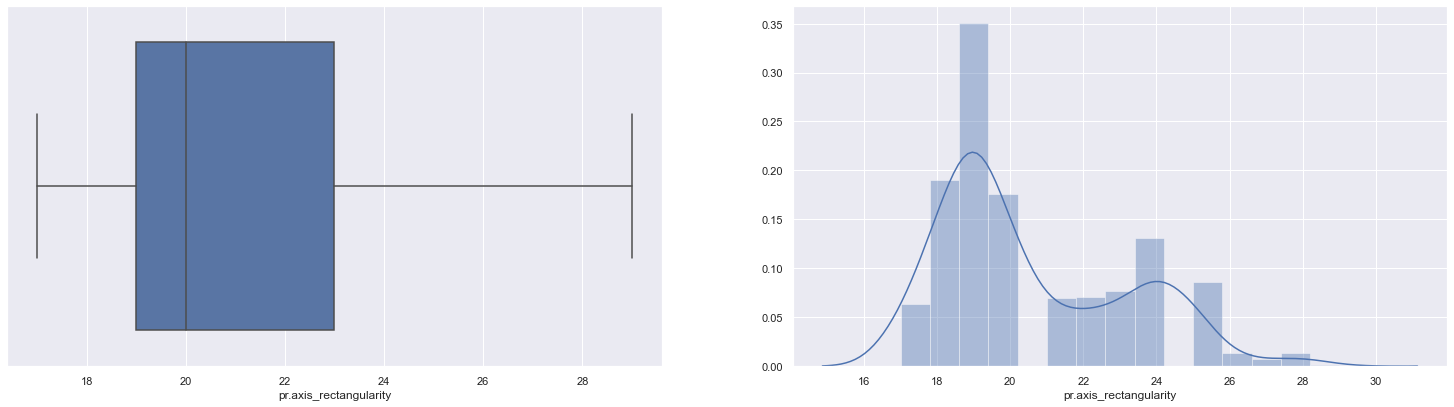

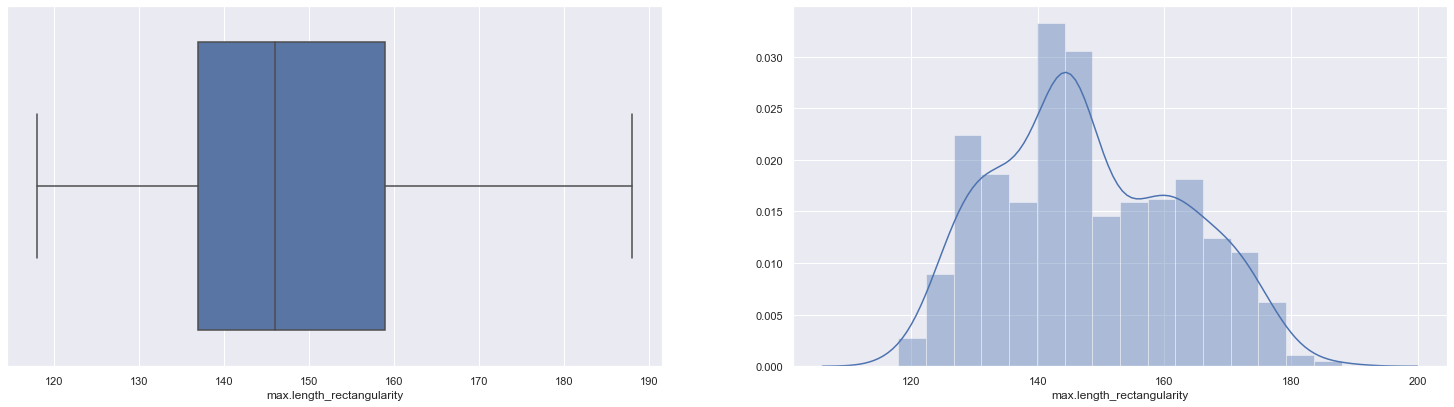

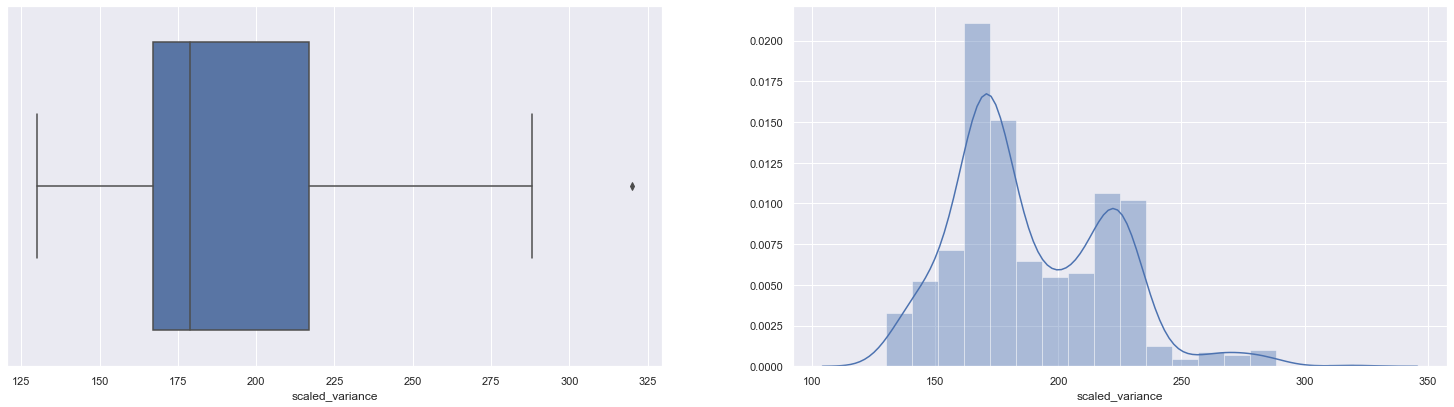

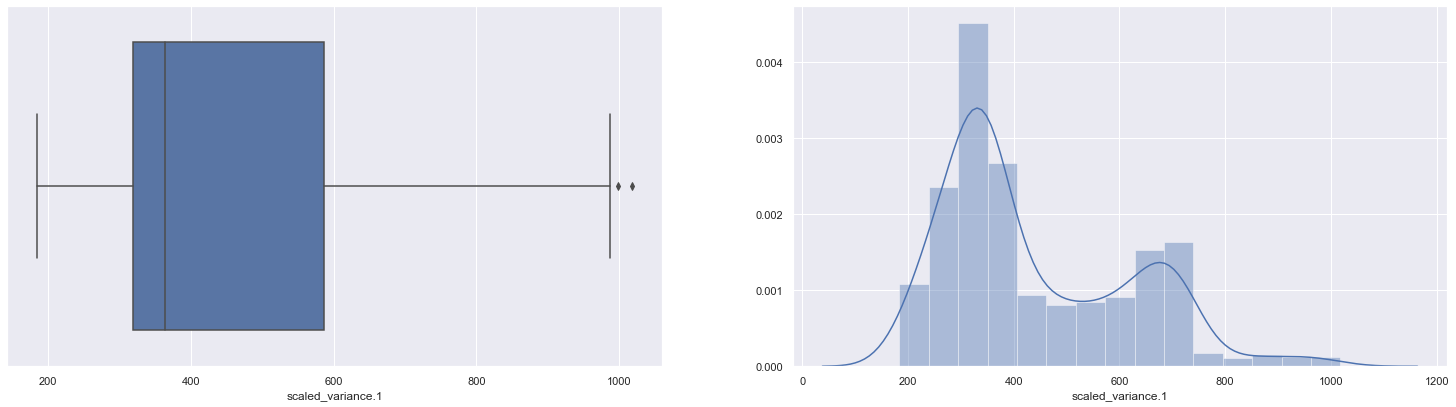

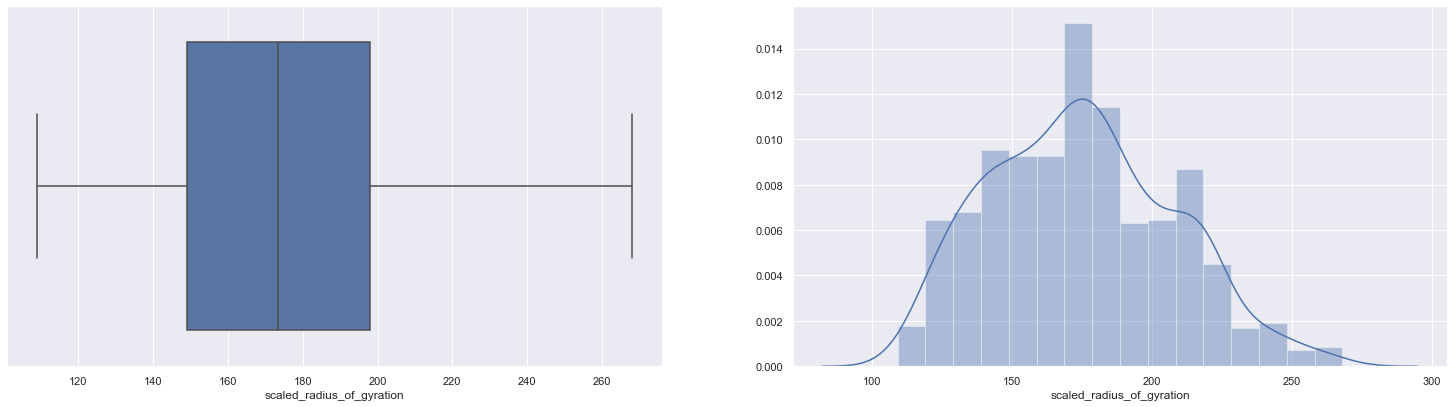

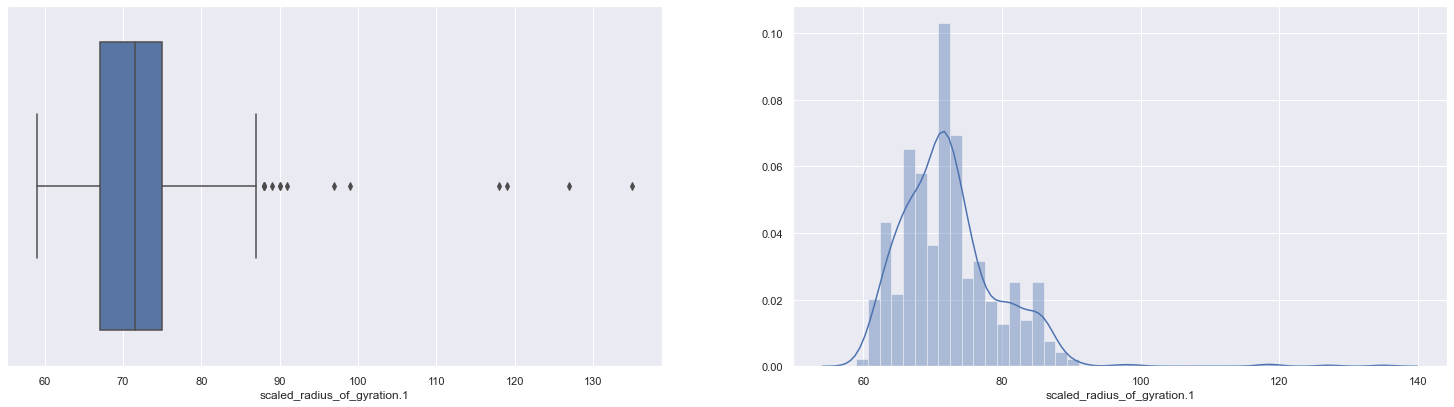

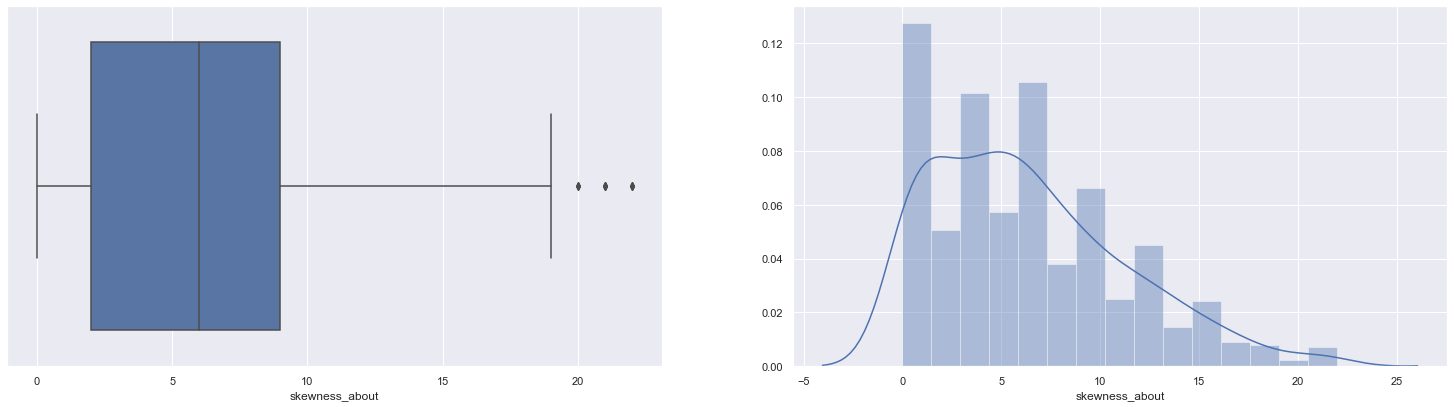

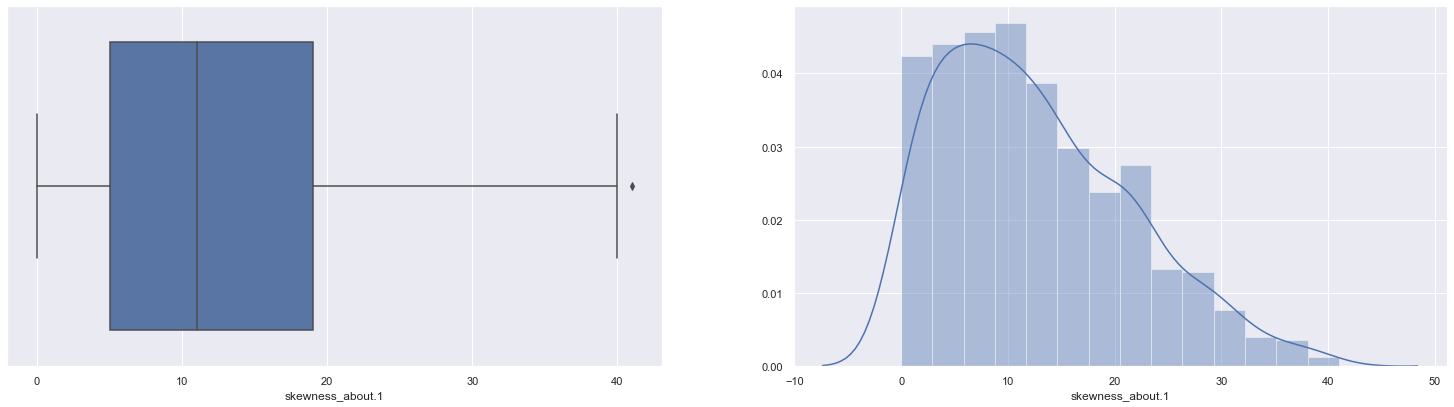

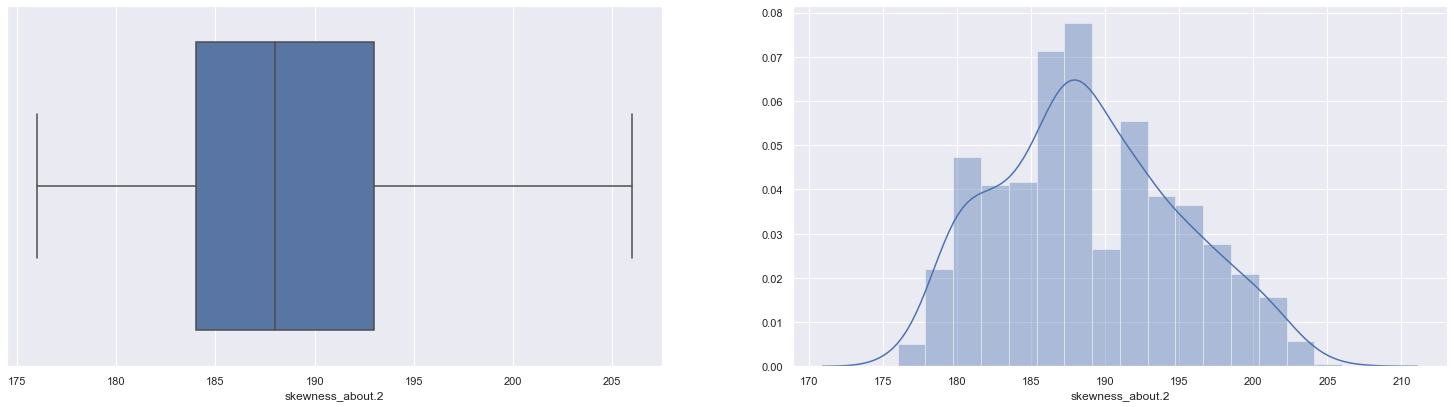

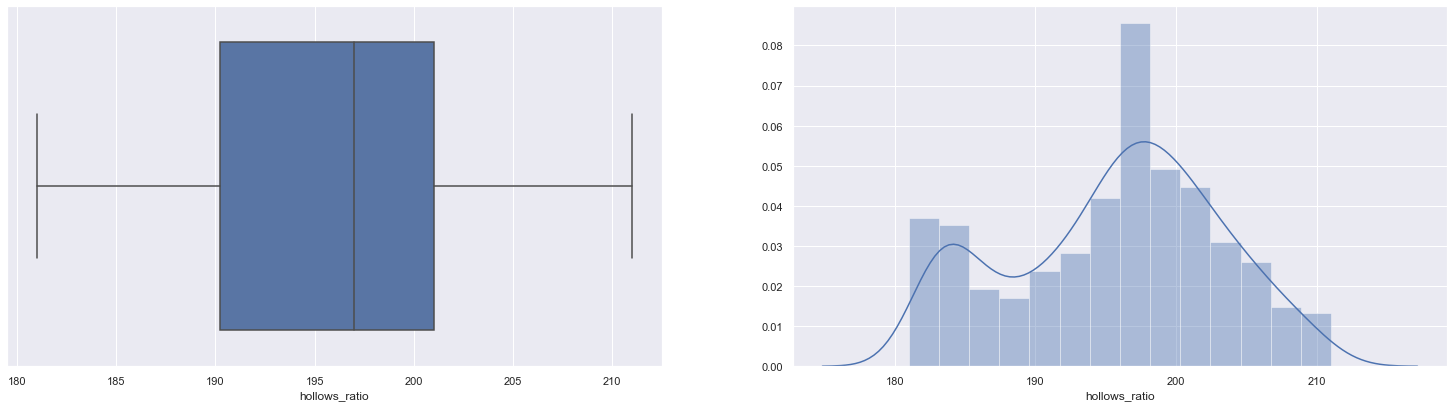

In [18]:
for i in range(0,len(col)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(vehicle_df[col[i]], ax = axes[0])
    sns.distplot(vehicle_df[col[i]], ax = axes[1])
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

In [19]:
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

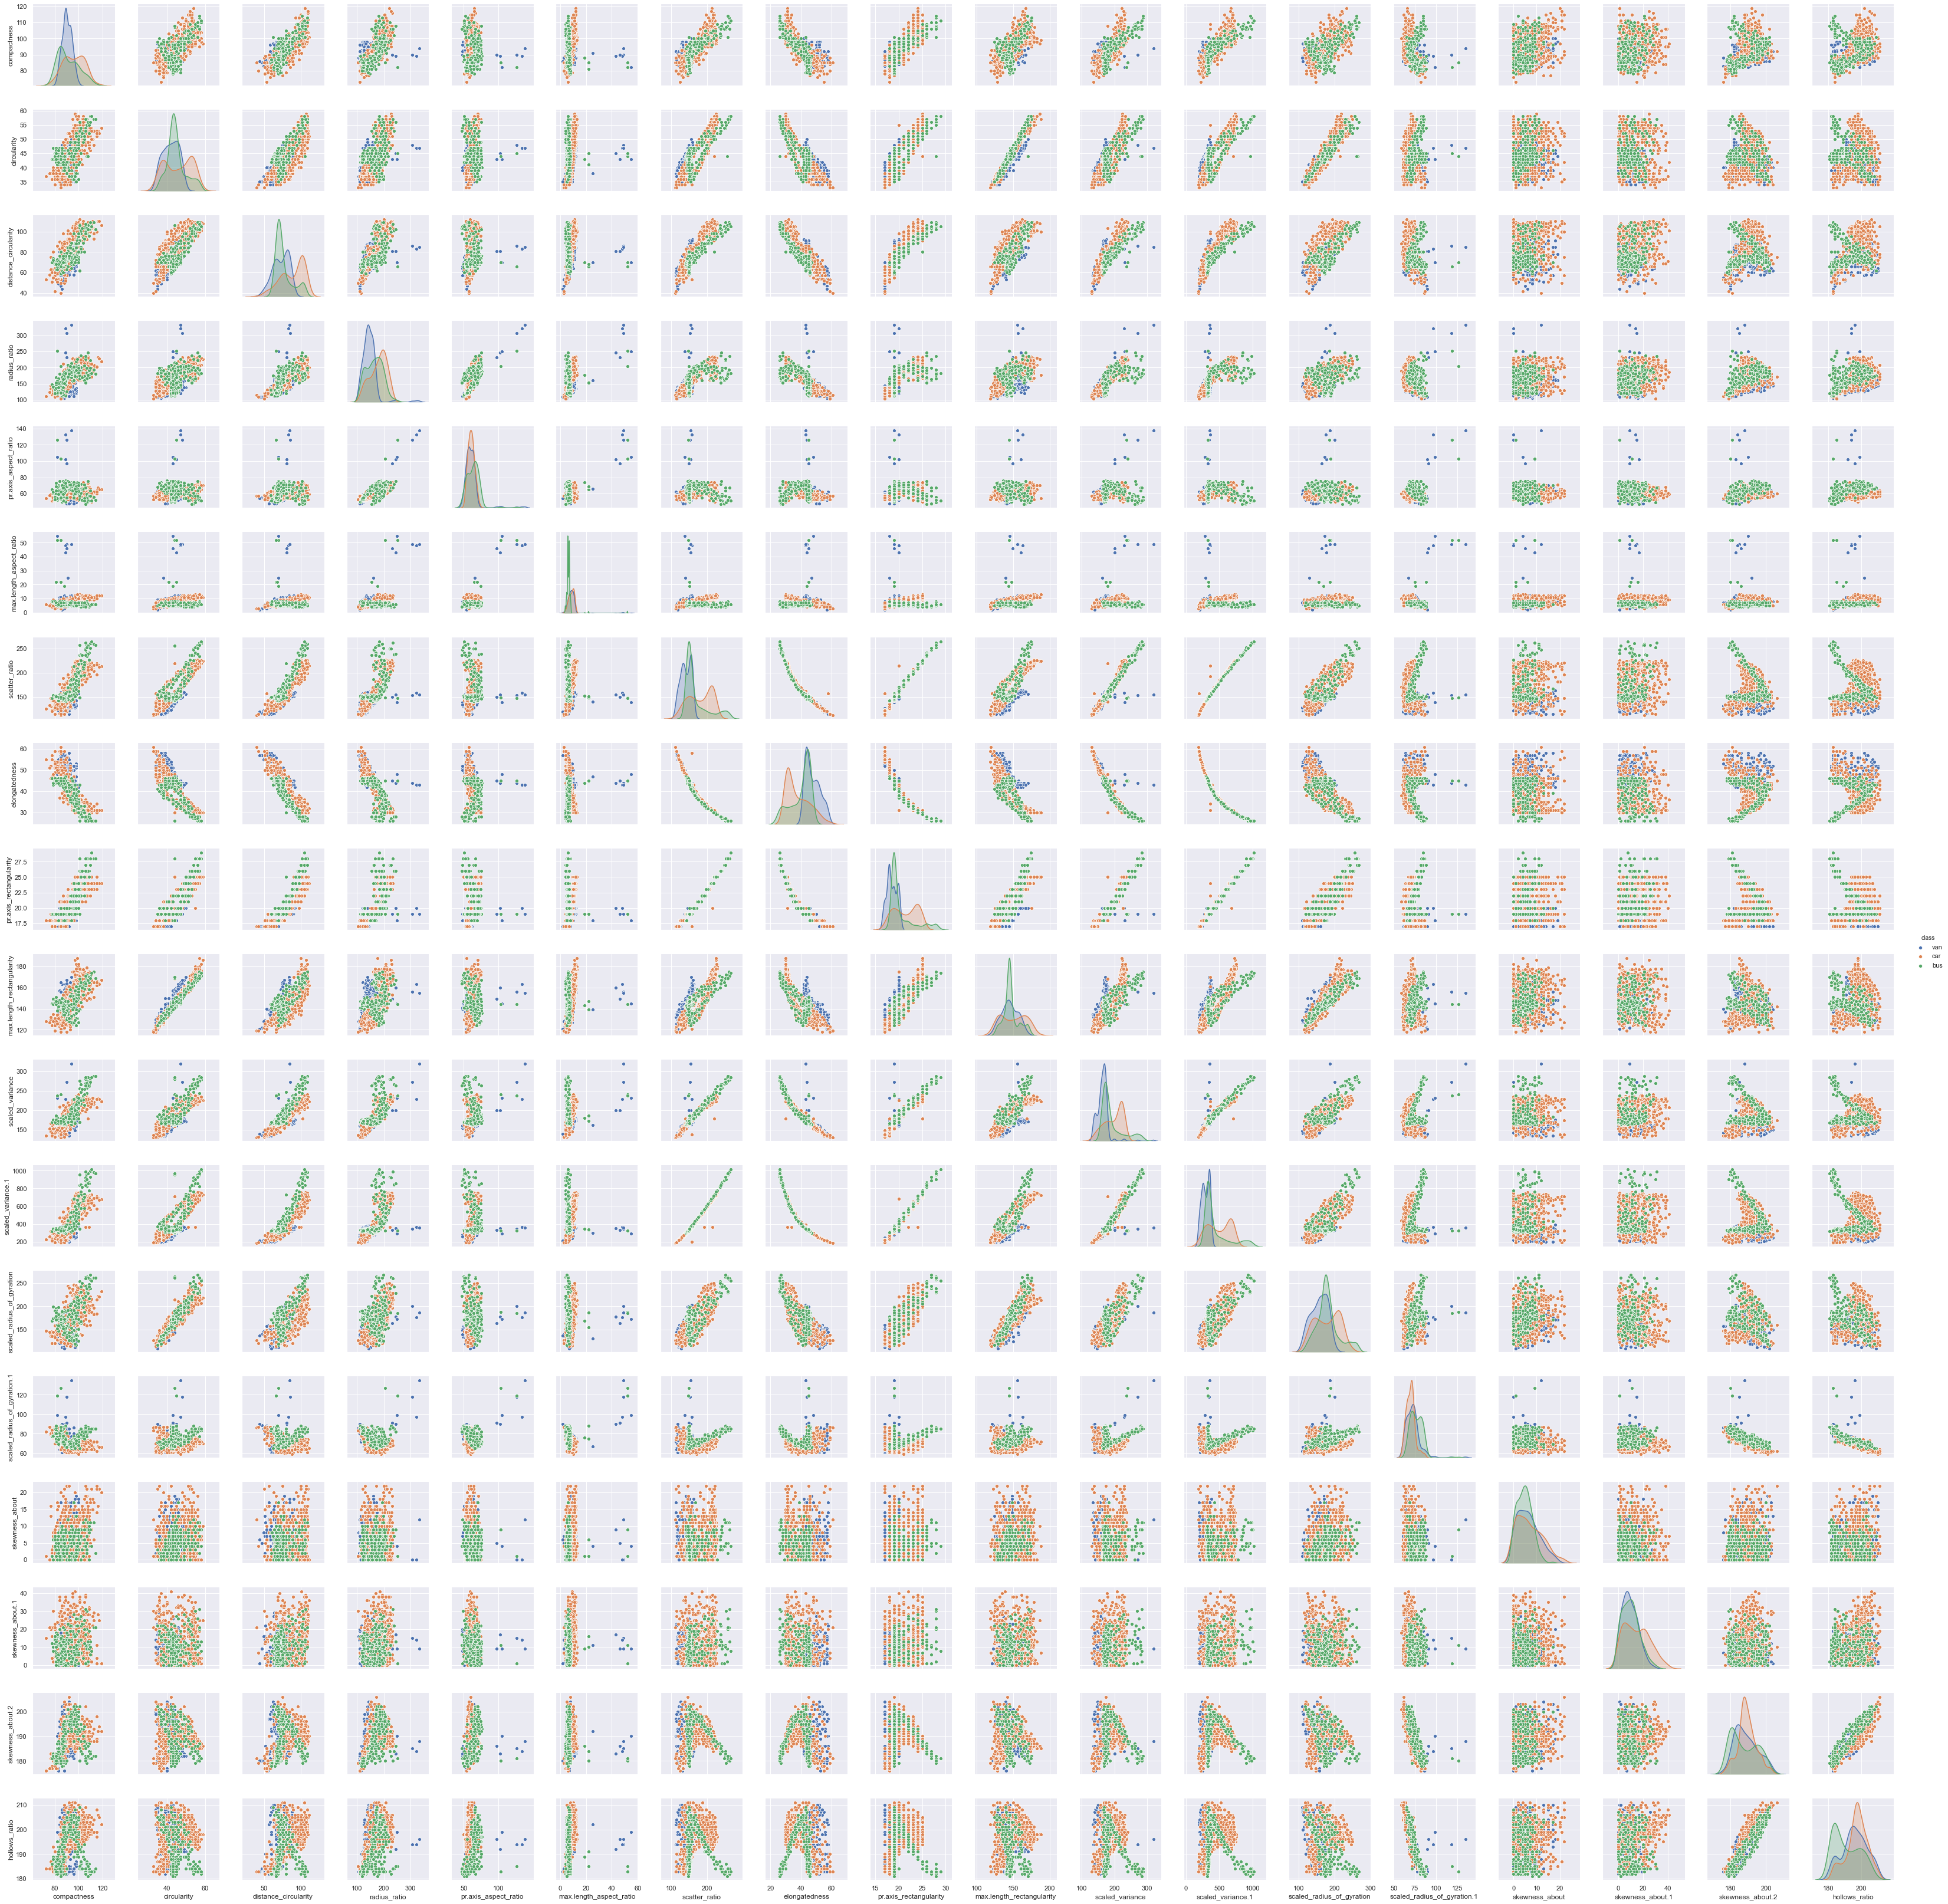

In [20]:
sns.pairplot(vehicle_df, diag_kind='kde',hue = 'class')

In [20]:
vehicle_df = vehicle_df.apply(LabelEncoder().fit_transform)

In [21]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           20           15                    36            71   
1           16            8                    37            34   
2           29           17                    57           102   
3           18            8                    35            52   
4           10           11                    23            98   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    25                        8             48   
1                    10                        7             35   
2                    19                        8             92   
3                    16                        7             30   
4                    32                       19             35   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             16                       3                         41   
1             19                       2                         25   
2              6                       6                         40   
3             20                       2                         25   
4             19                       2                         26   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0               45                165                         73   
1               39                116                         46   
2               90                313                        109   
3               29                 95                         15   
4              106                111                         77   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           11               6                16   
1                           14               9                14   
2                           15              14                 9   
3                            4               6                10   
4                           38               9                11   

   skewness_about.2  hollows_ratio  class  
0                11             16      2  
1                13             18      2  
2                12             15      1  
3                23             26      2  
4                 4              2      0

###### Identiying the outliers:

In [22]:
Q1= vehicle_df.quantile(0.25)

In [23]:
Q3= vehicle_df.quantile(0.75)

In [24]:
Q1

compactness                     12.00
circularity                      7.00
distance_circularity            23.00
radius_ratio                    34.00
pr.axis_aspect_ratio            10.00
max.length_aspect_ratio          5.00
scatter_ratio                   33.00
elongatedness                    7.00
pr.axis_rectangularity           2.00
max.length_rectangularity       19.00
scaled_variance                 36.00
scaled_variance.1              104.25
scaled_radius_of_gyration       37.00
scaled_radius_of_gyration.1      8.00
skewness_about                   2.00
skewness_about.1                 5.00
skewness_about.2                 8.00
hollows_ratio                    9.25
class                            0.00
Name: 0.25, dtype: float64

In [25]:
Q3

compactness                     25.00
circularity                     16.00
distance_circularity            50.00
radius_ratio                    88.00
pr.axis_aspect_ratio            18.00
max.length_aspect_ratio          8.00
scatter_ratio                   83.00
elongatedness                   20.00
pr.axis_rectangularity           6.00
max.length_rectangularity       41.00
scaled_variance                 84.00
scaled_variance.1              283.75
scaled_radius_of_gyration       87.00
scaled_radius_of_gyration.1     17.00
skewness_about                   9.00
skewness_about.1                19.00
skewness_about.2                17.00
hollows_ratio                   20.00
class                            1.00
Name: 0.75, dtype: float64

In [26]:
IQR = Q3-Q1

In [27]:
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            27.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   50.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 48.00
scaled_variance.1              179.50
scaled_radius_of_gyration       50.00
scaled_radius_of_gyration.1      9.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [28]:
Maxi = Q3+ (1.5 * IQR)
Min  = Q1-(1.5 * IQR)

In [29]:
Maxi

compactness                     44.500
circularity                     29.500
distance_circularity            90.500
radius_ratio                   169.000
pr.axis_aspect_ratio            30.000
max.length_aspect_ratio         12.500
scatter_ratio                  158.000
elongatedness                   39.500
pr.axis_rectangularity          12.000
max.length_rectangularity       74.000
scaled_variance                156.000
scaled_variance.1              553.000
scaled_radius_of_gyration      162.000
scaled_radius_of_gyration.1     30.500
skewness_about                  19.500
skewness_about.1                40.000
skewness_about.2                30.500
hollows_ratio                   36.125
class                            2.500
dtype: float64

In [30]:
Min

compactness                     -7.500
circularity                     -6.500
distance_circularity           -17.500
radius_ratio                   -47.000
pr.axis_aspect_ratio            -2.000
max.length_aspect_ratio          0.500
scatter_ratio                  -42.000
elongatedness                  -12.500
pr.axis_rectangularity          -4.000
max.length_rectangularity      -14.000
scaled_variance                -36.000
scaled_variance.1             -165.000
scaled_radius_of_gyration      -38.000
scaled_radius_of_gyration.1     -5.500
skewness_about                  -8.500
skewness_about.1               -16.000
skewness_about.2                -5.500
hollows_ratio                   -6.875
class                           -1.500
dtype: float64

In [31]:
vehicle_df_outliers = vehicle_df[((vehicle_df > Maxi) | (vehicle_df< Min)).any(axis=1)]

In [32]:
vehicle_df_outliers

compactness  circularity  distance_circularity  radius_ratio  \
4             10           11                    23            98   
37            15           15                    39           131   
44            43           21                    57           113   
100            7           12                    20           130   
113           13            2                     5            14   
123           15            3                    11            23   
127           10            8                    20            48   
135           14           14                    36           132   
190           22           15                    47            91   
230           10            2                     3             3   
291           14           12                    34           128   
346           42           19                    61           121   
388           19           14                    38           133   
391           16            5                    23            53   
400           32           20                    59           106   
505           40           20                    51            98   
516           17            9                    28            65   
523           15           10                    34           123   
623           31           19                    59           100   
655           11            2                     2             3   
706            7           10                    23           129   
761           40           18                    51            94   
796           10            5                    17            23   
797           36           20                    59           104   
815            6           12                    21            47   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                      32                       19             35   
37                     34                       18             39   
44                     18                       10             98   
100                    34                       19             34   
113                    11                        3              1   
123                    10                        4              8   
127                    18                       13             35   
135                    35                       17             44   
190                    16                        7             67   
230                     8                        1              4   
291                    31                       15             41   
346                    18                       10             97   
388                    36                       18             41   
391                    19                       14             26   
400                    17                       10             91   
505                    17                        9            105   
516                    13                        6             33   
523                    30                       16             36   
623                    17                       10            106   
655                     7                        0              6   
706                    33                       20             25   
761                    13                       10             81   
796                     8                        5              9   
797                    14                        9             92   
815                    22                       13             37   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4               19                       2                         26   
37              18                       2                         38   
44               5                       7                         49   
100             19                       2                         26   
113             33                       0        

In [33]:
vehicle_df_outliers.shape

(25, 19)

In [34]:
vehicle_df_outliers['class'].value_counts()

1    12
2     9
0     4
Name: class, dtype: int64

###### Outlier Treatment(Removing Outlier)

In [80]:
vehicle_df_clean = vehicle_df.drop(vehicle_df_outliers.index)

In [81]:
vehicle_df_clean.shape

(821, 19)

In [82]:
vehicle_df_clean.dtypes

compactness                    int64
circularity                    int64
distance_circularity           int64
radius_ratio                   int64
pr.axis_aspect_ratio           int64
max.length_aspect_ratio        int64
scatter_ratio                  int64
elongatedness                  int64
pr.axis_rectangularity         int64
max.length_rectangularity      int64
scaled_variance                int64
scaled_variance.1              int64
scaled_radius_of_gyration      int64
scaled_radius_of_gyration.1    int64
skewness_about                 int64
skewness_about.1               int64
skewness_about.2               int64
hollows_ratio                  int64
class                          int32
dtype: object

In [83]:
col1 = pd.Series(vehicle_df_clean.select_dtypes(include= ['int32','int64', 'float64']).columns)

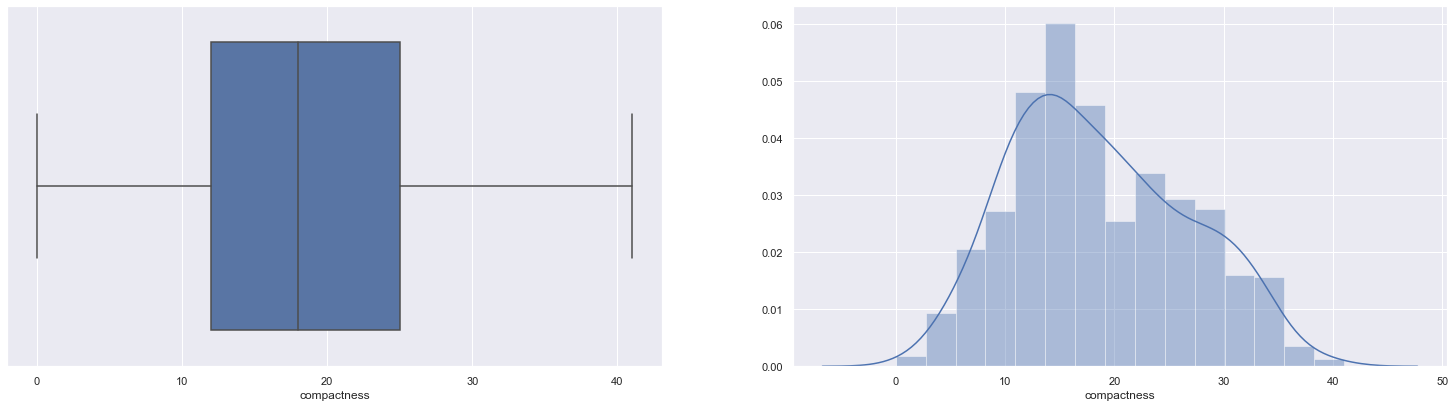

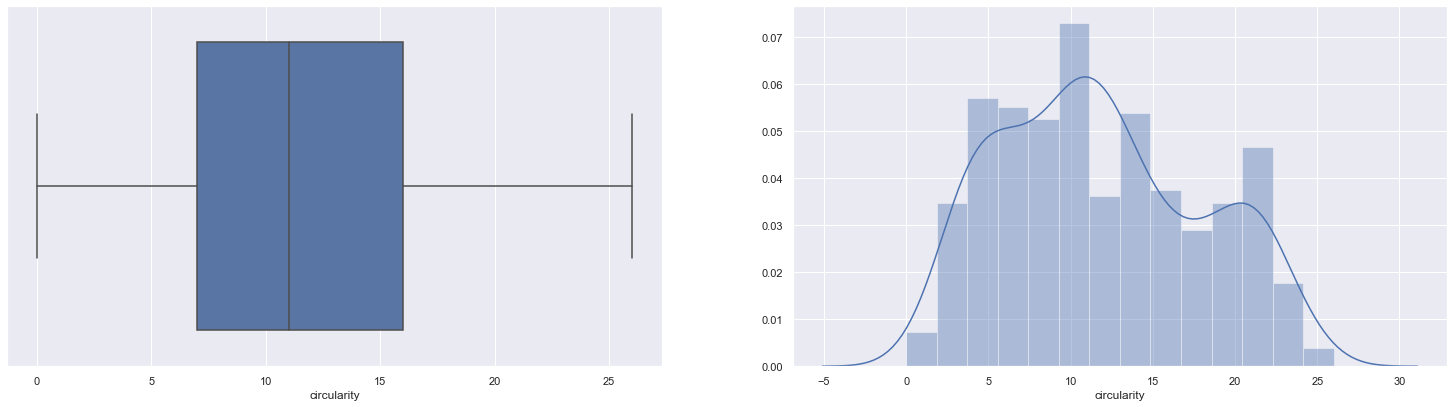

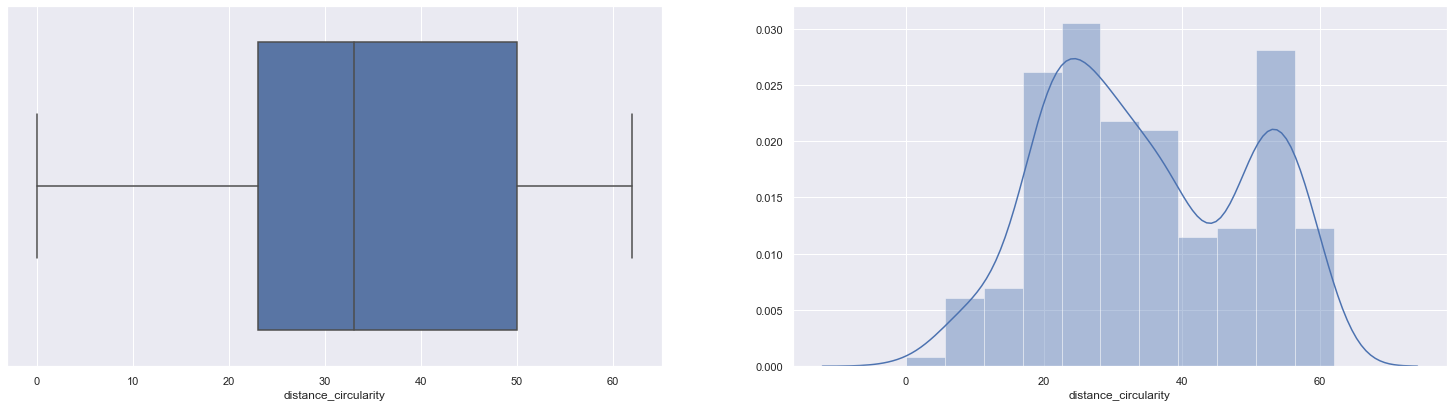

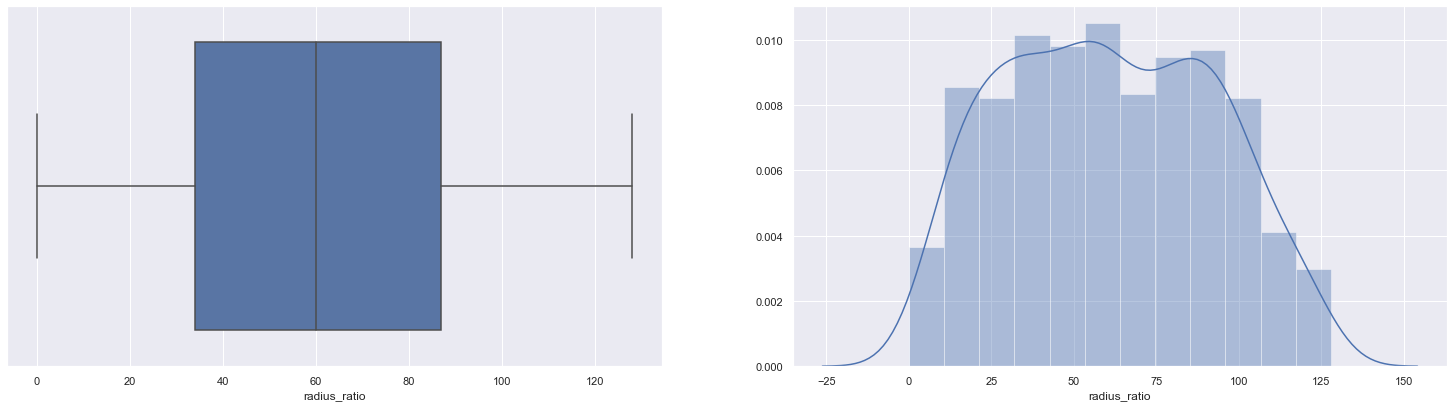

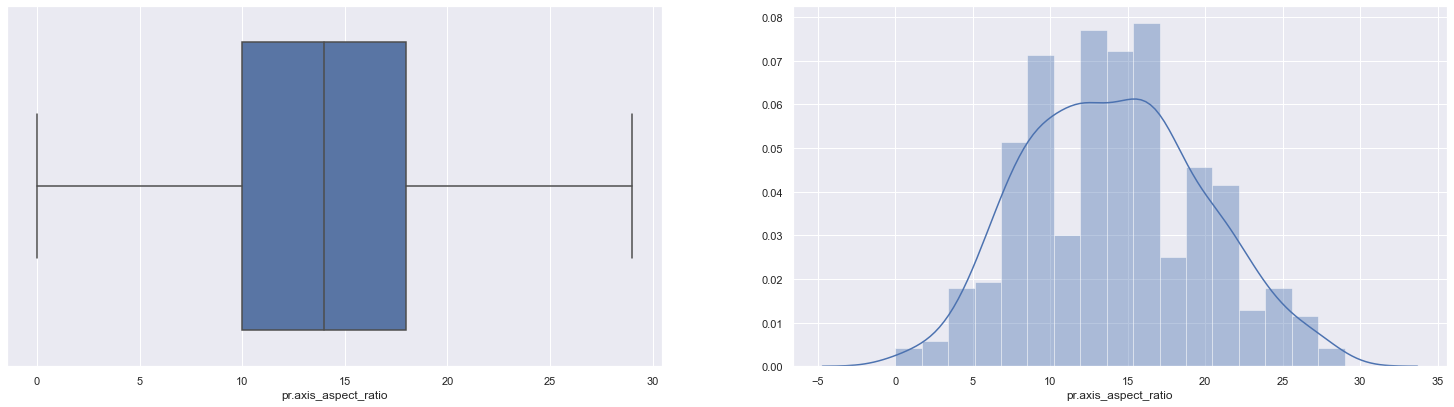

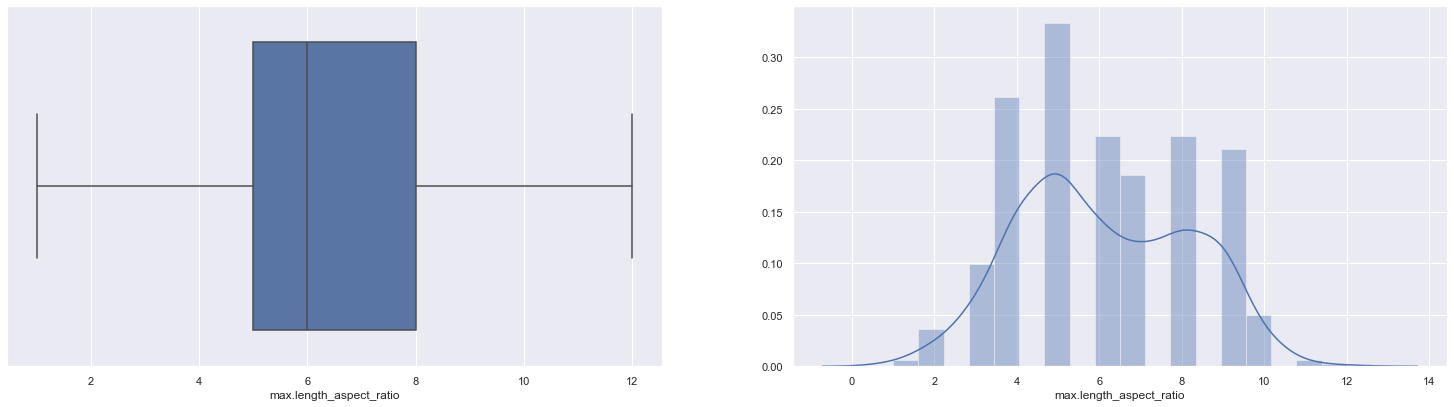

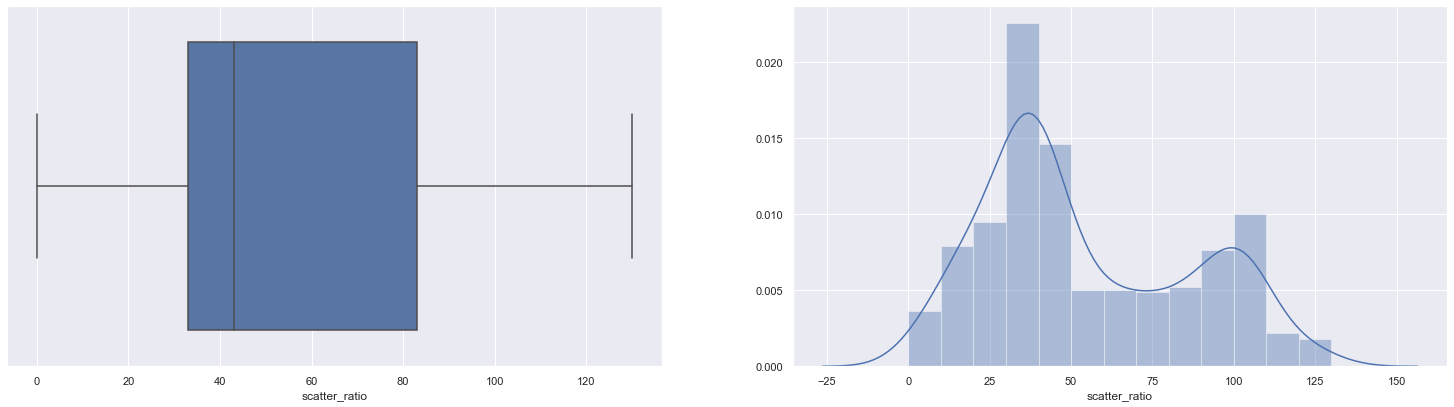

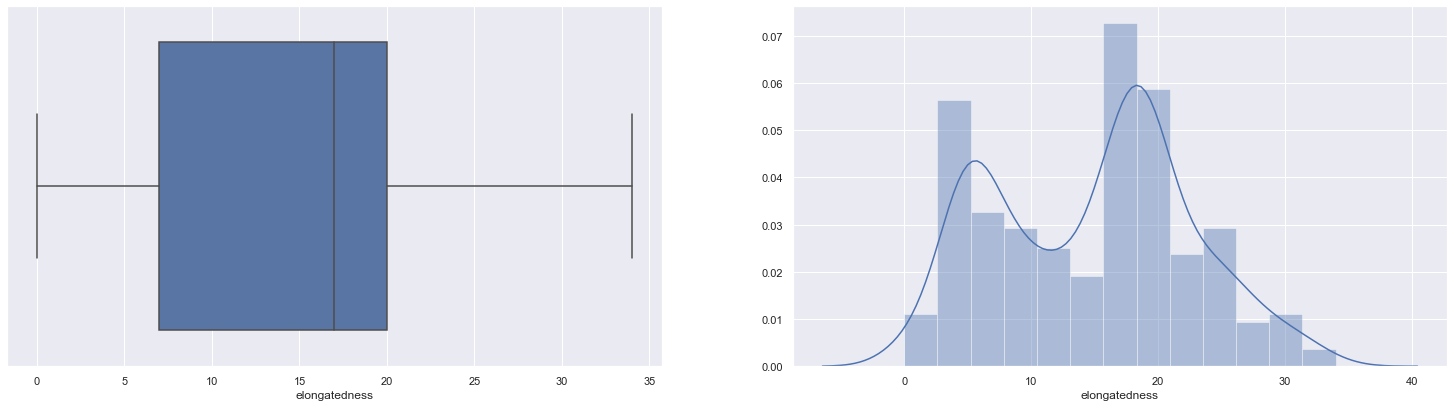

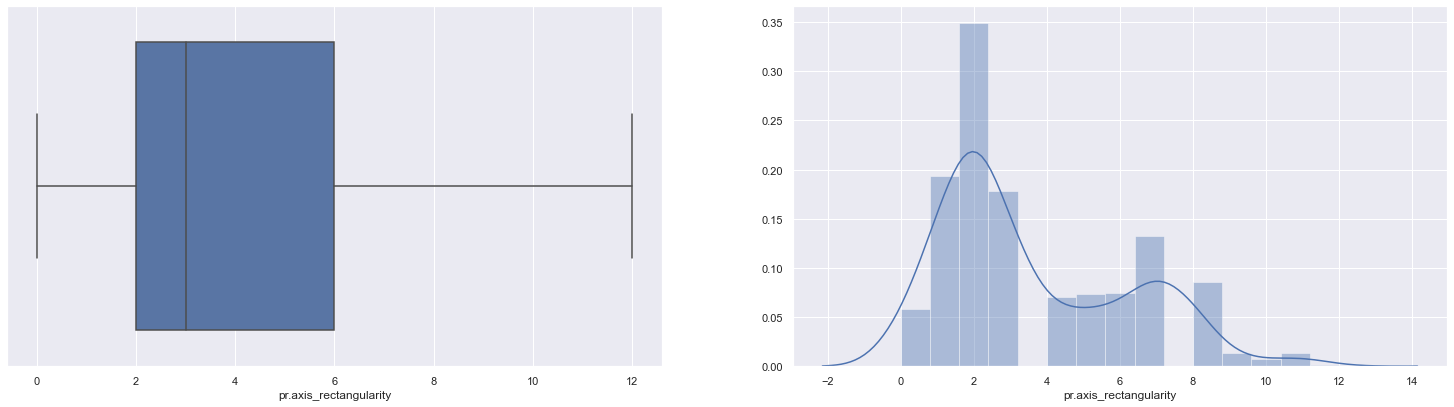

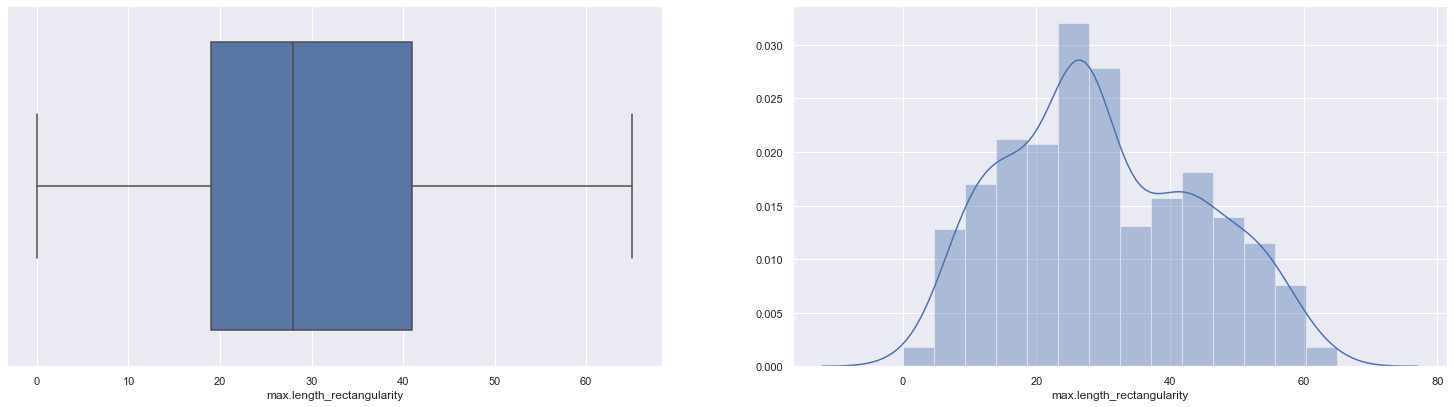

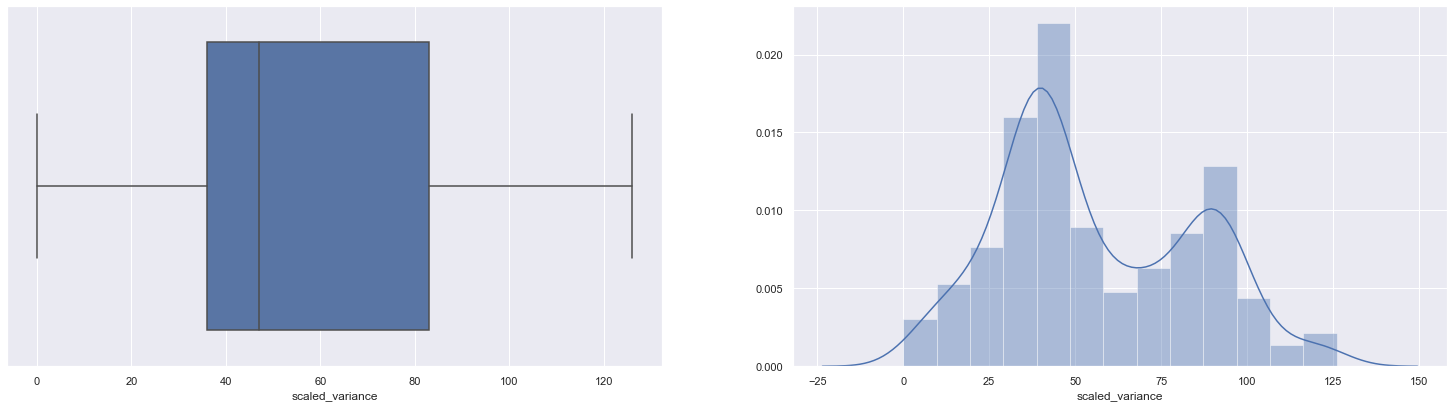

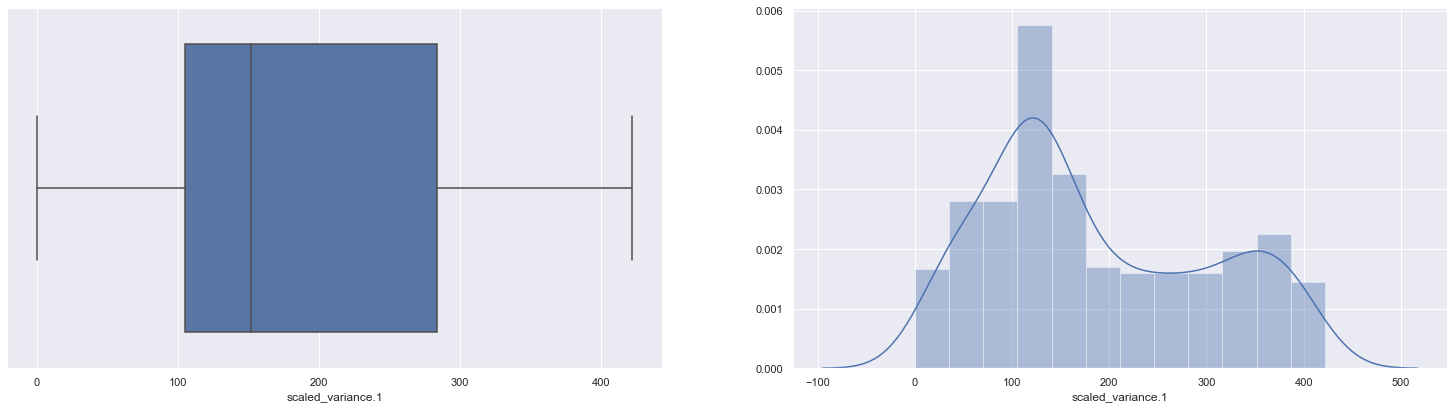

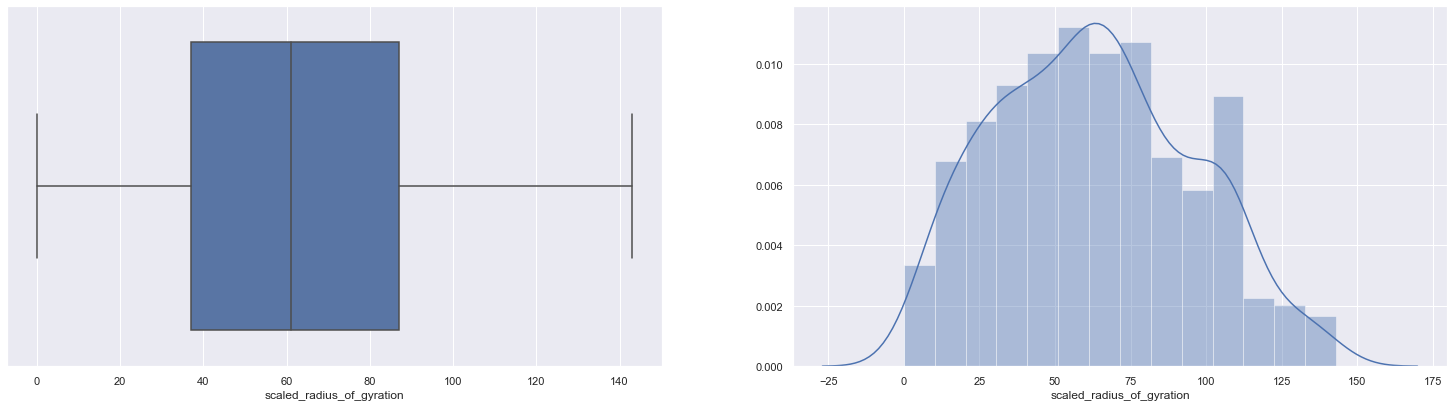

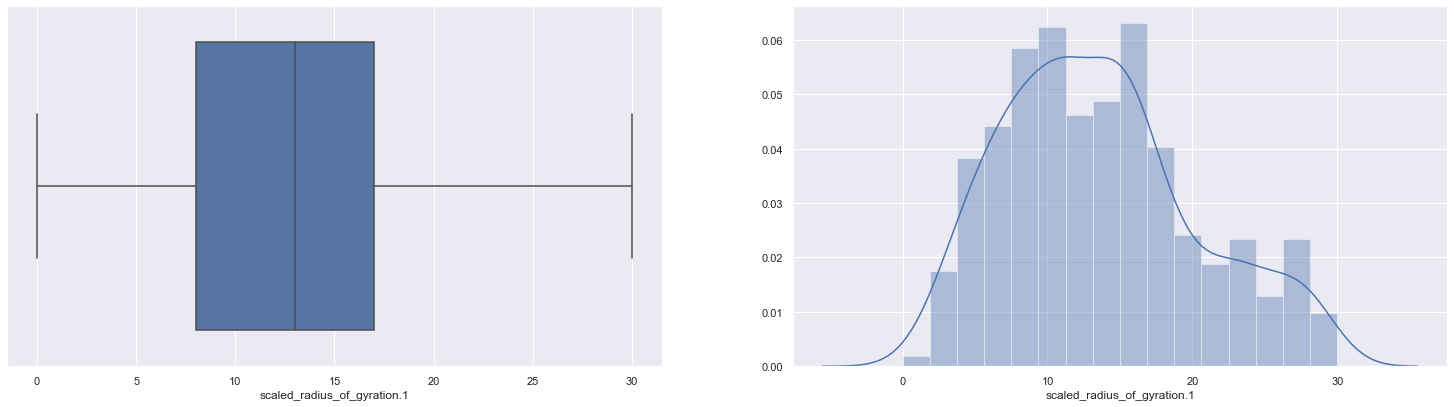

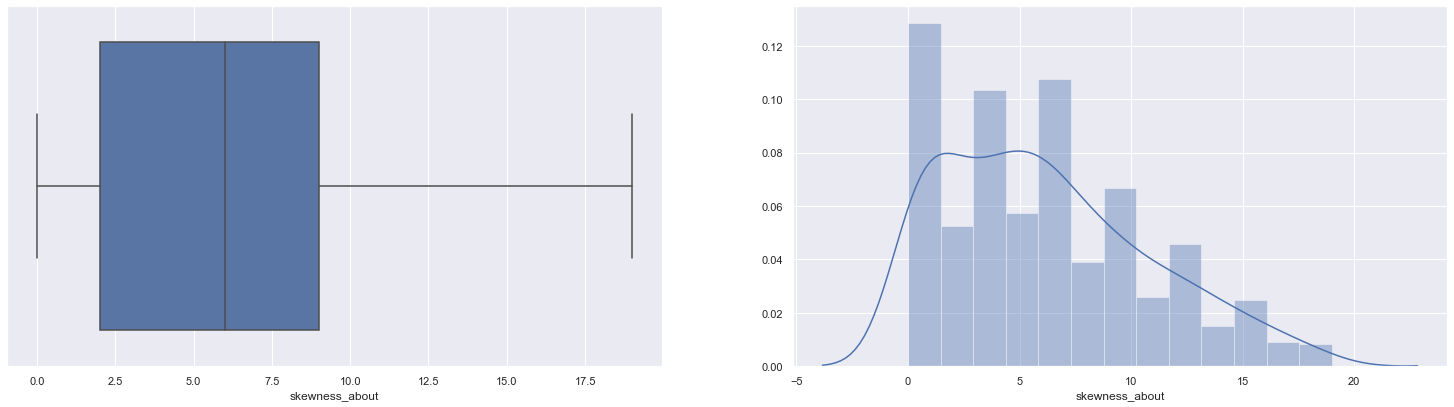

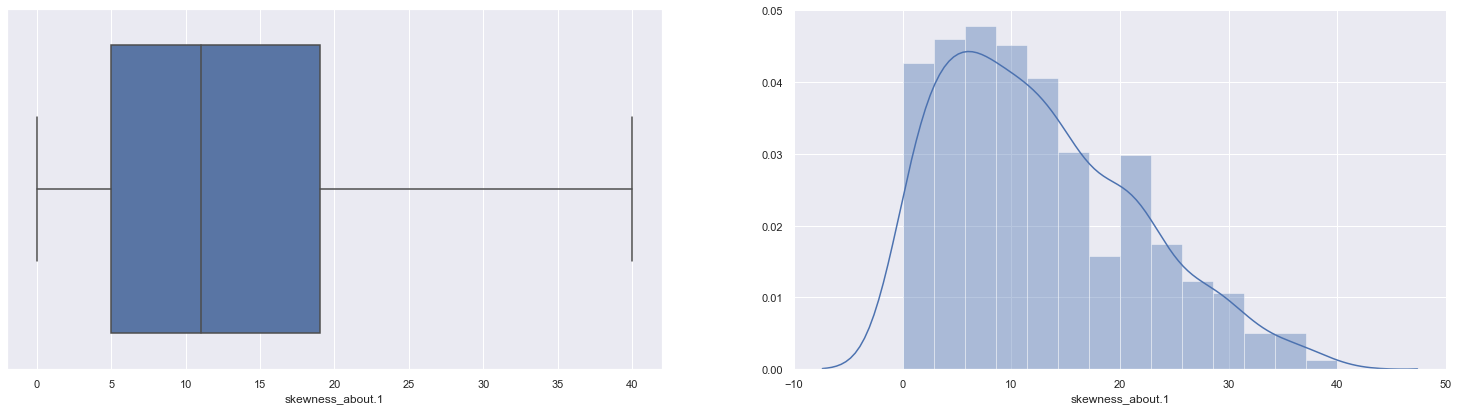

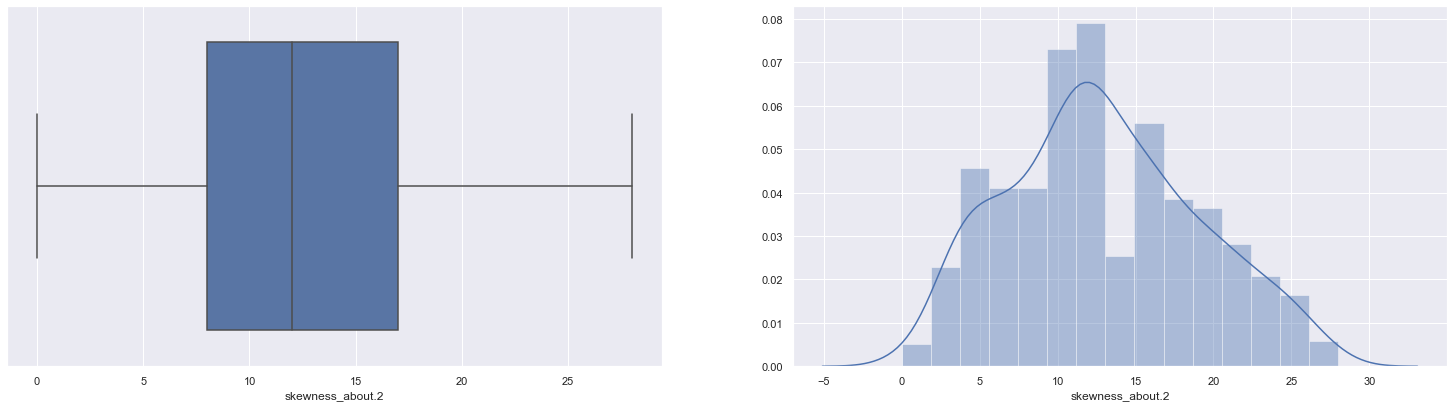

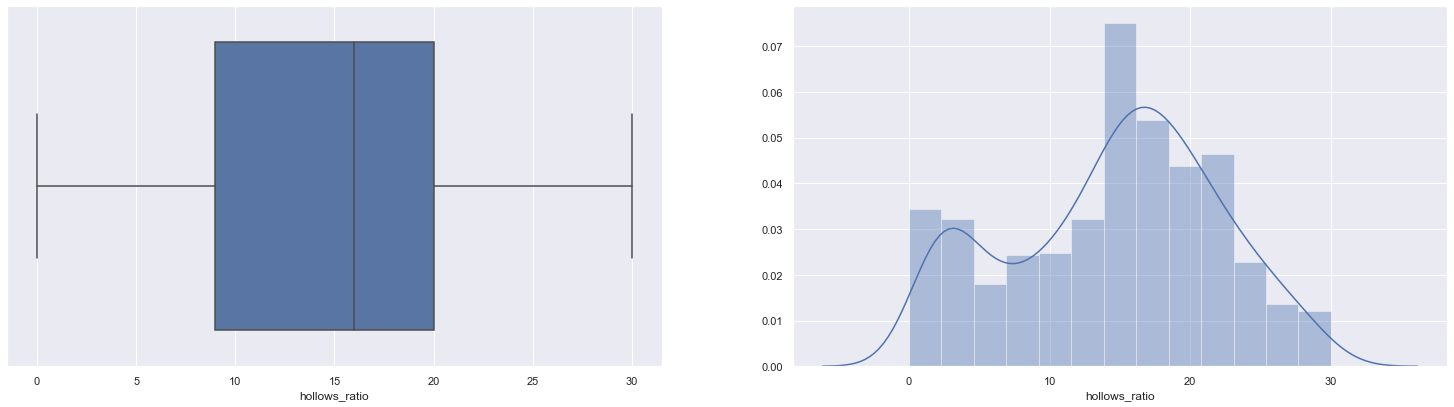

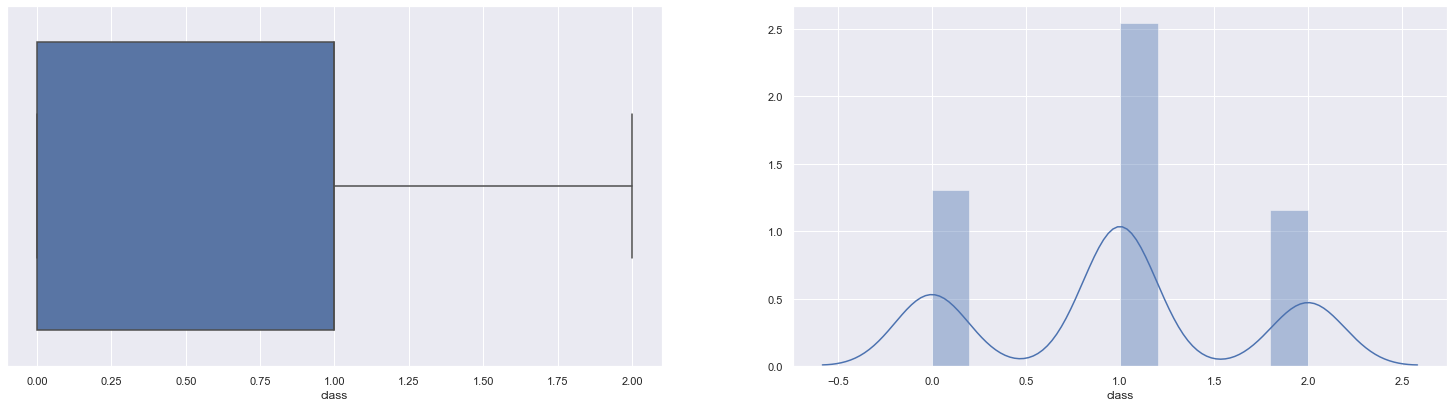

In [84]:
for i in range(0,len(col1)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(vehicle_df_clean[col1[i]], ax = axes[0])
    sns.distplot(vehicle_df_clean[col1[i]], ax = axes[1])
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

###### Box plot representing that there is no outlier in the data post the outlier treatment.

In [85]:
vehicle_df_clean.skew() == vehicle_df.skew()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [86]:
vehicle_df_clean.kurtosis() == vehicle_df.kurtosis()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [ ]:
## Transformation of independent variable.

In [87]:
X = vehicle_df_clean.drop('class', axis = 1)

In [88]:
y = vehicle_df_clean['class']

In [89]:
X.shape

(821, 18)

In [90]:
y.shape

(821,)

In [91]:
x_scaled = StandardScaler().fit_transform(X)

In [92]:
x_scaled

array([[ 0.16768932,  0.51860483,  0.07550643, ...,  0.37907234,
        -0.31415535,  0.18780929],
       [-0.32753705, -0.6233193 ,  0.1440803 , ...,  0.15452805,
         0.01232762,  0.45784681],
       [ 1.28194865,  0.84486887,  1.51555767, ..., -0.40683269,
        -0.15091387,  0.05279053],
       ...,
       [ 1.52956183,  1.49739695,  1.17268833, ..., -0.96819343,
        -0.31415535,  0.72788433],
       [-0.94657001, -1.43897939, -0.26736292, ...,  1.38952168,
         0.1755691 , -0.08222823],
       [-1.0703766 , -1.43897939, -1.02167547, ...,  0.60361664,
        -0.47739684, -0.75732204]])

In [50]:
## Covariance matrix

In [93]:
cov_matrix = np.cov(x_scaled.T)
print("Covariance Matrix \n", cov_matrix)

Covariance Matrix 
 [[ 1.00121951  0.68444795  0.78957679  0.74557575  0.19097172  0.48019714
   0.81612031 -0.7921166   0.81577494  0.67884336  0.79852272  0.81311054
   0.58395585 -0.23932304  0.19954077  0.15985844  0.28701253  0.35055575]
 [ 0.68444795  1.00121951  0.78599652  0.64029222  0.19643953  0.54718631
   0.85074099 -0.81895996  0.8428104   0.96271869  0.81513469  0.84242129
   0.93126621  0.07794524  0.13910374 -0.0172727  -0.1206173   0.02953416]
 [ 0.78957679  0.78599652  1.00121951  0.80969126  0.23806947  0.65386463
   0.9114214  -0.90973284  0.89281463  0.76796788  0.89924789  0.90772056
   0.70319208 -0.23073947  0.09952504  0.26599598  0.13021649  0.31754774]
 [ 0.74557575  0.64029222  0.80969126  1.00121951  0.66263109  0.45652619
   0.79868258 -0.84370144  0.75986306  0.57709839  0.81432224  0.81355458
   0.55188854 -0.40141398  0.03843739  0.18752347  0.4194488   0.50193712]
 [ 0.19097172  0.19643953  0.23806947  0.66263109  1.00121951  0.14976609
   0.2037714  

In [54]:
## Eigen decomposition(Eigen Vector, Eigen Values)

In [94]:
eigen_values, eigen_vector = np.linalg.eig(cov_matrix)

In [95]:
print("Eigen Vectors \n", eigen_vector)
print("Eigen Values \n", eigen_values)

Eigen Vectors 
 [[-2.71626269e-01 -8.04529226e-02  2.61706411e-02  1.36182985e-01
   1.51244129e-01  2.72287559e-01  1.61035235e-01 -7.85445713e-01
  -3.28933517e-01 -1.24913547e-01  1.84053179e-02  1.32305027e-02
  -1.71248264e-02  6.13917716e-02  1.77772132e-01  8.51937071e-03
  -2.38057779e-02  4.92787674e-03]
 [-2.84867939e-01  1.41225970e-01  2.02315540e-01 -1.90580004e-02
  -1.32454150e-01 -6.03541470e-02 -3.95775226e-01 -4.85491913e-02
  -4.44241572e-02  2.27477247e-01 -3.70124621e-02 -1.79633432e-01
  -3.84498178e-02  3.74298723e-01 -8.49514730e-02  9.06281916e-02
   9.67063947e-02  6.50930989e-01]
 [-3.01110252e-01 -4.03716045e-02 -7.97568680e-02  1.07466089e-01
  -7.19655779e-02 -1.21861732e-02  1.72536937e-01  2.67445637e-01
  -3.05435593e-01 -1.36677551e-01 -7.99980626e-01  9.80940525e-02
  -3.91406575e-03 -6.29714748e-02 -2.09328473e-02 -4.45256770e-02
  -9.68387474e-02  7.63323712e-02]
 [-2.73487951e-01 -2.01326629e-01 -3.44218132e-02 -2.48287188e-01
   1.38226540e-01 -1.

In [96]:
total = sum(eigen_values)
variance_explained = [(i/total)*100 for i in sorted(eigen_values, reverse = True)]

In [97]:
cummulative_var = np.cumsum(variance_explained)
print("Cummulative Variance \n", cummulative_var)

Cummulative Variance 
 [ 54.50976335  73.24795637  79.90206051  86.19255408  91.10531042
  94.71601256  96.52065625  97.7899453   98.43247972  98.84356234
  99.19543987  99.43658588  99.58857089  99.73455926  99.8390931
  99.92068095  99.97907976 100.        ]


<Figure size 720x360 with 0 Axes>

<BarContainer object of 18 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

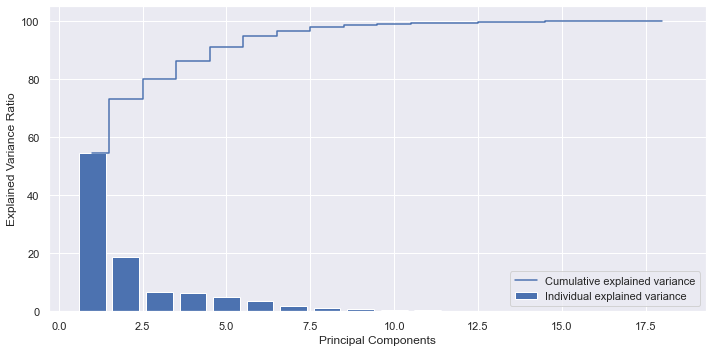

In [98]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), variance_explained, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cummulative_var, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [99]:
Pricipal_comp_composition = (pd.DataFrame(cummulative_var).reset_index())
Pricipal_comp_composition.columns = ['Pricipal Components', '% info retained']
Pricipal_comp_composition

Pricipal Components  % info retained
0                     0        54.509763
1                     1        73.247956
2                     2        79.902061
3                     3        86.192554
4                     4        91.105310
5                     5        94.716013
6                     6        96.520656
7                     7        97.789945
8                     8        98.432480
9                     9        98.843562
10                   10        99.195440
11                   11        99.436586
12                   12        99.588571
13                   13        99.734559
14                   14        99.839093
15                   15        99.920681
16                   16        99.979080
17                   17       100.000000

 From the above the chart and table we can consider 7 principal components for 96% information gain. 
 However, considering 11 principal components for 99% information gain.

In [100]:
pca = PCA(n_components = 11)
principal_components = pca.fit_transform(x_scaled)

In [101]:
red_dimen = pd.DataFrame(data = principal_components, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
red_dimen.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.649586 -0.667884 -0.520754 -0.666655 -0.790917 -1.811176 -0.240280   
1  1.524457 -0.313195 -0.213817  1.279259 -0.325468 -0.110956  0.227616   
2 -3.965874  0.265768 -1.243015  0.234089  0.891115 -0.678465  0.820839   
3  1.574726 -3.032143 -0.483420  0.376976 -0.661312  0.363612  0.106562   
4 -4.729743  4.342529  1.057149  0.163336  1.401876  2.309622  0.381583   
5  0.786135 -2.227798 -2.031587 -0.255830  1.464491  0.679412 -0.369320   
6  2.017055 -1.563787 -1.114419 -0.786049 -1.276759  0.042074 -0.357307   
7  4.479861 -3.317720  0.484299  0.007594 -0.506285  0.617885 -0.398958   
8 -1.261611 -1.980836  0.518184  0.458829 -1.079297  0.363712  0.735877   
9  3.409019 -2.082256  0.240362 -0.031367 -1.156629  0.288495  0.425264   

        PC8       PC9      PC10      PC11  
0  0.675659  0.331457  0.227122 -0.044969  
1 -0.096242 -0.173075 -0.371798 -0.465472  
2 -0.107800  0.306497 -0.543511 -0.145059  
3  0.216655 -0.285782  0.274752 -0.563255  
4 -0.283583  0.029565 -0.650591 -0.018312  
5  0.095106 -0.147949 -0.138555  0.049841  
6  0.349664 -0.012506 -0.102116  0.283999  
7  0.201003 -0.387016 -0.023919 -0.040288  
8 -0.698468 -0.459389  0.041069 -0.268343  
9 -0.100168 -0.171061 -0.114678  0.087374

In [102]:
red_dimen.shape

(821, 11)

#### Building SVM using the new principle components

In [103]:
X_train_val, X_test, y_train_val, y_test = train_test_split(red_dimen, y, test_size= 0.20, random_state = 123)

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size= 0.30, random_state=123)

In [105]:
X_train.shape
y_train.shape
X_val.shape
y_val.shape
X_test.shape
y_test.shape

(459, 11)

(459,)

(197, 11)

(197,)

(165, 11)

(165,)

###### Linear Kernel

In [106]:
SVM_Linear_Model = SVC(kernel = 'linear', C = 0.01, probability = True)

In [107]:
SVM_Linear_Model.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
SVM_Linear_Model.score(X_train, y_train)

0.8823529411764706

In [108]:
SVM_prediction = SVM_Linear_Model.predict(X_val)

In [109]:
SVM_prediction

array([0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1])

In [110]:
print(classification_report(y_val,SVM_prediction))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        46
           1       0.90      0.93      0.91        98
           2       0.89      0.92      0.91        53

    accuracy                           0.89       197
   macro avg       0.88      0.87      0.88       197
weighted avg       0.89      0.89      0.89       197



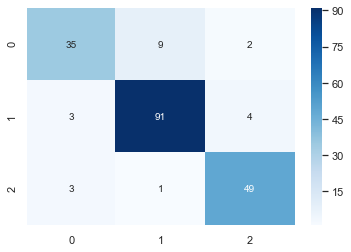

In [112]:
sns.heatmap(confusion_matrix(y_val,SVM_prediction), annot=True, cmap='Blues',fmt='g')

###### RBF Kernel

In [113]:
SVM_RBF_Model = SVC(kernel = 'rbf', C = 0.01, probability= True)

In [114]:
SVM_RBF_Model.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
SVM_RBF_Model.score(X_train, y_train)

0.5076252723311547

In [115]:
SVMRB_prediction = SVM_RBF_Model.predict(X_val)

In [116]:
SVMRB_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
print(classification_report(y_val,SVMRB_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.50      1.00      0.66        98
           2       0.00      0.00      0.00        53

    accuracy                           0.50       197
   macro avg       0.17      0.33      0.22       197
weighted avg       0.25      0.50      0.33       197



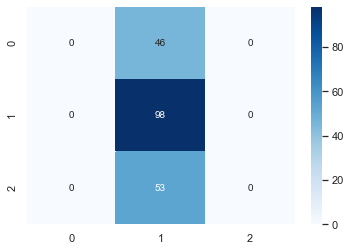

In [119]:
sns.heatmap(confusion_matrix(y_val,SVMRB_prediction), annot=True, cmap='Blues',fmt='g')

###### Grid Search

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
sv_model = SVC()
grid_values = {'kernel':['linear','rbf'], 'C':[0.01,0.05,0.5,1]}
grid_svm = GridSearchCV(sv_model, param_grid = grid_values, cv= 5)
grid_svm.fit(X_train, y_train)

C:\Users\Najeen Joseph\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print(grid_svm.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [123]:
grid_svm_predict= grid_svm.predict(X_val)

In [124]:
print('Classification report :',classification_report(y_val, grid_svm_predict))

Classification report :               precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.93      0.98      0.96        98
           2       0.94      0.91      0.92        53

    accuracy                           0.95       197
   macro avg       0.96      0.94      0.95       197
weighted avg       0.95      0.95      0.95       197



confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


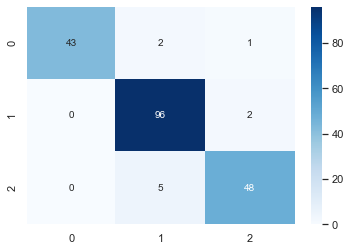

In [125]:
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_val,grid_svm_predict), annot=True, cmap='Blues',fmt='g'))

The best hyperparamets for SVM-classifier using PCA is C = '1', kernel = RBF

###### Building the SVM model using obtained best hyperparamters

In [126]:
SVM_best = SVC(kernel = 'rbf', C= 1, probability = True)

In [127]:
SVM_best.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [128]:
SVM_best.score(X_train, y_train)

0.9760348583877996

In [129]:
SVM_best_prediction = SVM_best.predict(X_val)

In [130]:
SVM_best_prediction

array([0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1])

In [131]:
print(classification_report(y_val,SVM_best_prediction))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.93      0.98      0.96        98
           2       0.94      0.91      0.92        53

    accuracy                           0.95       197
   macro avg       0.96      0.94      0.95       197
weighted avg       0.95      0.95      0.95       197



confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


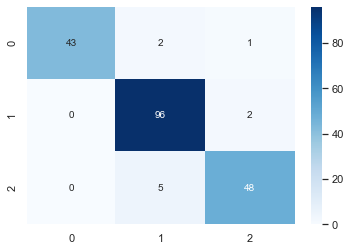

In [132]:
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_val,SVM_best_prediction), annot=True, cmap='Blues',fmt='g'))

#### Testing the model on Test set

In [133]:
SVM_best_prediction_test = SVM_best.predict(X_test)

In [134]:
SVM_best_prediction_test

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1])

In [135]:
print(classification_report(y_test,SVM_best_prediction_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.99      0.99      0.99        86
           2       0.97      0.94      0.95        33

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165



confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


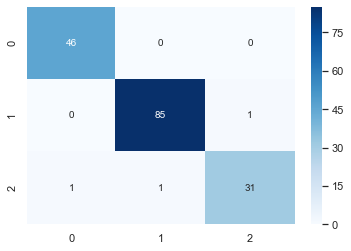

In [136]:
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_test,SVM_best_prediction_test), annot=True, cmap='Blues',fmt='g'))

##### Model giving higher accuracy 95 % in validation set,  Test set = (98%). Training set = 97.06%

## Feature Selection on the preprocessed data:

In [137]:
vehicle_df_clean.shape

(821, 19)

In [138]:
x = vehicle_df_clean.drop('class', axis=1)

In [139]:
y= vehicle_df_clean['class']

In [140]:
X_scaled = x.apply(zscore)

In [141]:
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.167689     0.518605              0.075506      0.323200   
1    -0.327537    -0.623319              0.144080     -0.850481   
2     1.281949     0.844869              1.515558      1.306554   
3    -0.079924    -0.623319              0.006933     -0.279501   
5     1.653368    -0.133923              1.515558      0.132873   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.916580                 0.915541      -0.203209   
1             -0.733025                 0.431225      -0.612040   
2              0.856738                 0.915541       1.180527   
3              0.326817                 0.431225      -0.769283   
5             -1.969508                -1.021725       2.186881   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.146196               -0.230937                   0.763361   
1       0.532964               -0.617874                  -0.343550   
2      -1.143030                0.929875                   0.694179   
3       0.661886               -0.617874                  -0.343550   
5      -1.916565                2.864561                   1.455180   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.383712          -0.187096                   0.310315   
1        -0.595661          -0.615162                  -0.521860   
2         1.205908           1.105838                   1.419882   
3        -0.948910          -0.798619                  -1.477320   
5         2.371628           2.005650                   2.436984   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.390079       -0.037221          0.379072   
1                     0.058457        0.612964          0.154528   
2                     0.207969        1.696606         -0.406833   
3                    -1.436662       -0.037221         -0.294561   
5                     2.002113       -0.253950         -0.406833   

   skewness_about.2  hollows_ratio  
0         -0.314155       0.187809  
1          0.012328       0.457847  
2         -0.150914       0.052791  
3          1.644742       1.537997  
5         -1.293604      -1.702453

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, random_state=1)

In [143]:
x_train.shape

(574, 18)

In [144]:
y_train.shape

(574,)

In [145]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [146]:
SVMModel = SVC()

###### Selecting the best 15 features using Forward selection

In [147]:
sfs1 = sfs(SVMModel, k_features= 15, forward = True, scoring = 'accuracy', cv=5)

In [148]:
sfs1= sfs1.fit(x_train.values, y_train.values)

In [149]:
sfs1.get_metric_dict()

{1: {'feature_idx': (6,),
  'cv_scores': array([0.62931034, 0.66956522, 0.5826087 , 0.60526316, 0.68421053]),
  'avg_score': 0.6341915884163181,
  'feature_names': ('6',),
  'ci_bound': 0.04902559614590672,
  'std_dev': 0.03814357936214916,
  'std_err': 0.019071789681074577},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.81034483, 0.83478261, 0.82608696, 0.75438596, 0.8245614 ]),
  'avg_score': 0.8100323522449303,
  'feature_names': ('5', '6'),
  'ci_bound': 0.037153743007875197,
  'std_dev': 0.028906874294890254,
  'std_err': 0.014453437147445127},
 3: {'feature_idx': (5, 6, 9),
  'cv_scores': array([0.86206897, 0.86956522, 0.85217391, 0.83333333, 0.90350877]),
  'avg_score': 0.8641300402430364,
  'feature_names': ('5', '6', '9'),
  'ci_bound': 0.029733642549173635,
  'std_dev': 0.023133784052820183,
  'std_err': 0.01156689202641009},
 4: {'feature_idx': (4, 5, 6, 9),
  'cv_scores': array([0.9137931 , 0.90434783, 0.88695652, 0.89473684, 0.92982456]),
  'avg_score': 0.90593177095

In [150]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Text(0.5, 1.0, 'Sequential Forward Selection (w. accuracy)')

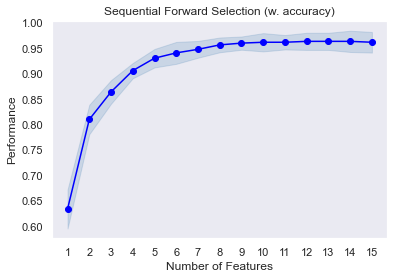

In [151]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.show()

In [152]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]


In [153]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['compactness', 'circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.2']


In [154]:
newfeatures_vehicle_df = vehicle_df_clean[subsetColumnList]

In [155]:
newfeatures_vehicle_df.shape

(821, 15)

######  PCA with the newly selected features:

In [156]:
X_scaled1 = StandardScaler().fit_transform(newfeatures_vehicle_df)

In [157]:
cov_matrix = np.cov(X_scaled1.T)
print("Covariance Matrix \n", cov_matrix)

Covariance Matrix 
 [[ 1.00121951  0.68444795  0.74557575  0.19097172  0.48019714  0.81612031
  -0.7921166   0.81577494  0.67884336  0.79852272  0.81311054  0.58395585
  -0.23932304  0.19954077  0.28701253]
 [ 0.68444795  1.00121951  0.64029222  0.19643953  0.54718631  0.85074099
  -0.81895996  0.8428104   0.96271869  0.81513469  0.84242129  0.93126621
   0.07794524  0.13910374 -0.1206173 ]
 [ 0.74557575  0.64029222  1.00121951  0.66263109  0.45652619  0.79868258
  -0.84370144  0.75986306  0.57709839  0.81432224  0.81355458  0.55188854
  -0.40141398  0.03843739  0.4194488 ]
 [ 0.19097172  0.19643953  0.66263109  1.00121951  0.14976609  0.2037714
  -0.29245215  0.15650108  0.13897178  0.23278197  0.23271782  0.14744973
  -0.32973364 -0.05476916  0.40904565]
 [ 0.48019714  0.54718631  0.45652619  0.14976609  1.00121951  0.49884389
  -0.48839288  0.47245054  0.63265227  0.43349783  0.49390575  0.3951016
  -0.33704819  0.07904943  0.06737468]
 [ 0.81612031  0.85074099  0.79868258  0.203771

In [158]:
eigen_values, eigen_vector = np.linalg.eig(cov_matrix)
print("Eigen Vectors \n", eigen_vector)
print("Eigen Values \n", eigen_values)

Eigen Vectors 
 [[ 2.83638119e-01  1.19397480e-01  1.52185543e-01  4.96257828e-02
  -2.93454169e-01  1.16193204e-02 -8.14700461e-01  2.92908729e-01
   1.00919981e-01  5.50550767e-02 -1.71181703e-01  1.41397608e-02
  -2.14115969e-02 -2.61881493e-02  4.94881582e-03]
 [ 3.05678157e-01 -1.37790121e-01  8.15523056e-02 -6.82997829e-02
   2.30570289e-01 -3.86321780e-01 -8.76455799e-03  1.18052540e-03
  -2.22254205e-01  3.44565868e-01  1.14935608e-01  3.44740884e-02
  -6.51142530e-01  2.42674273e-01  9.15155648e-02]
 [ 2.82507308e-01  2.83404153e-01 -1.74911292e-01  1.45372914e-01
   9.26048008e-02  1.62973694e-01  5.16288552e-02  2.19808433e-01
  -5.82299053e-02  3.07982205e-01  6.48196747e-01  5.10127144e-02
   1.43472122e-01 -3.84814263e-01  1.11156447e-01]
 [ 1.00933233e-01  3.60949729e-01 -3.56481459e-01  2.80870659e-01
   6.70836782e-01  1.66835532e-01 -1.80689111e-01 -3.77993404e-02
  -4.91274519e-02 -1.71321326e-01 -2.71919928e-01 -3.01191374e-02
  -2.62081579e-02  1.78397758e-01 -5.00

In [159]:
total = sum(eigen_values)
variance_explained = [(i/total)*100 for i in sorted(eigen_values, reverse = True)]
cummulative_var = np.cumsum(variance_explained)
print("Cummulative Variance \n", cummulative_var)

Cummulative Variance 
 [ 59.04667256  75.71497823  83.23247881  88.97710103  94.18525316
  96.61905002  98.08286347  98.77056389  99.26006679  99.48586423
  99.66408531  99.79523362  99.90281346  99.97424607 100.        ]


<Figure size 720x360 with 0 Axes>

<BarContainer object of 15 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

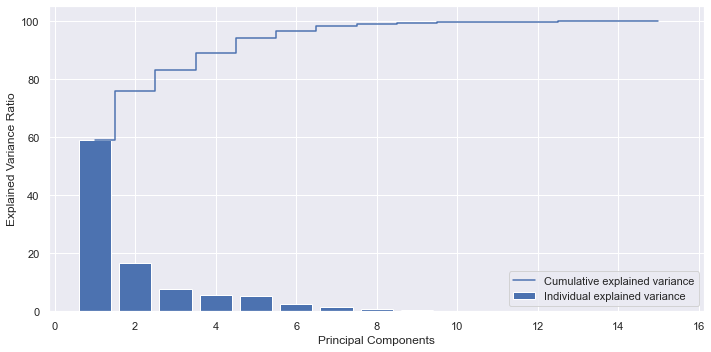

In [160]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), variance_explained, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cummulative_var, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [161]:
Pricipal_comp_composition = (pd.DataFrame(cummulative_var).reset_index())
Pricipal_comp_composition.columns = ['Pricipal Components', '% info retained']
Pricipal_comp_composition

Pricipal Components  % info retained
0                     0        59.046673
1                     1        75.714978
2                     2        83.232479
3                     3        88.977101
4                     4        94.185253
5                     5        96.619050
6                     6        98.082863
7                     7        98.770564
8                     8        99.260067
9                     9        99.485864
10                   10        99.664085
11                   11        99.795234
12                   12        99.902813
13                   13        99.974246
14                   14       100.000000

 From the above the chart and table we can consider 5 principal components for 95% information gain. 
 However, considering 9 principal components for 99% information gain.

In [162]:
pca = PCA(n_components = 9)
principal_components = pca.fit_transform(X_scaled1)
red_dimen_new = pd.DataFrame(data = principal_components, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
red_dimen_new.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.611550 -0.727019 -0.179865 -0.431553 -2.099777  0.072050  0.588140   
1 -1.706847  0.168342  1.068907 -0.422489  0.108597  0.289548  0.041982   
2  3.726493 -0.033131  0.997796  1.018451 -0.678038  0.754831  0.092590   
3 -1.848398 -2.437335  0.552215 -0.750469  0.099347 -0.173734  0.319406   
4  4.772126  3.623525 -0.603390  1.129888  2.667026 -0.055539 -0.072909   
5 -0.698771 -2.086200  1.090908  1.576515 -0.022885 -0.787224  0.141440   
6 -1.844764 -1.295375 -0.149390 -0.953468 -0.956245 -0.607416  0.293494   
7 -4.538092 -2.459921 -0.286417 -0.651112  0.569208 -0.434630  0.148074   
8  0.838729 -1.593173 -0.003142 -1.309203  0.553110  0.605327 -0.606800   
9 -3.444892 -1.609274 -0.257312 -1.230256  0.159170  0.274661 -0.075197   

        PC8       PC9  
0  0.226776  0.265183  
1 -0.235283 -0.247539  
2  0.287209 -0.501166  
3 -0.498252  0.327120  
4  0.129632 -0.579918  
5 -0.129185 -0.172868  
6  0.077005 -0.149035  
7 -0.347037  0.032091  
8 -0.521398  0.005247  
9 -0.124884 -0.142737

###### Building SVM using the new principle components

In [163]:
X_train_val, X_test, y_train_val, y_test = train_test_split(red_dimen_new, y, test_size= 0.20, random_state = 3)

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size= 0.30, random_state=3)

In [165]:
X_train.shape
y_train.shape
X_val.shape
y_val.shape
X_test.shape
y_test.shape

(459, 9)

(459,)

(197, 9)

(197,)

(165, 9)

(165,)

###### Linear SVM model

In [166]:
SVM_Linear_Model1 = SVC(kernel = 'linear', C = 0.01, probability = True)

In [167]:
SVM_Linear_Model1.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [168]:
SVM_prediction = SVM_Linear_Model1.predict(X_val)
SVM_prediction

array([0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1])

In [169]:
SVM_Linear_Model1.score(X_train,y_train)

0.8888888888888888

In [170]:
print(classification_report(y_val,SVM_prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        54
           1       0.95      0.83      0.89        89
           2       0.91      0.96      0.94        54

    accuracy                           0.89       197
   macro avg       0.88      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197



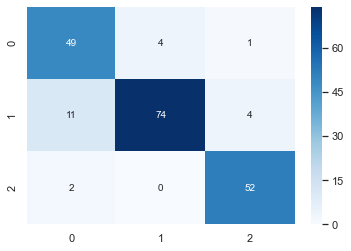

In [171]:
sns.heatmap(confusion_matrix(y_val,SVM_prediction), annot=True, cmap='Blues',fmt='g')

###### Using RBF Kernel

In [172]:
SVM_RBF_Model1 = SVC(kernel = 'rbf', C = 0.01, probability = True)

In [173]:
SVM_RBF_Model1.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [174]:
SVMRB_predict1 = SVM_RBF_Model1.predict(X_val)

In [175]:
SVM_RBF_Model1.score(X_train, y_train)

0.514161220043573

In [176]:
print(classification_report(y_val,SVMRB_predict1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.45      1.00      0.62        89
           2       0.00      0.00      0.00        54

    accuracy                           0.45       197
   macro avg       0.15      0.33      0.21       197
weighted avg       0.20      0.45      0.28       197



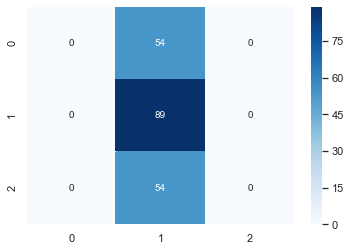

In [177]:
sns.heatmap(confusion_matrix(y_val,SVMRB_predict1), annot=True, cmap='Blues',fmt='g')

###### Grid Search

In [178]:
sv_model = SVC()
grid_values = {'kernel':['linear','rbf'], 'C':[0.01,0.05,0.5,1]}
grid_svm = GridSearchCV(sv_model, param_grid = grid_values, cv= 5)
grid_svm.fit(X_train, y_train)

C:\Users\Najeen Joseph\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [179]:
print(grid_svm.best_params_)

{'C': 0.5, 'kernel': 'rbf'}


In [180]:
grid_svm_predict= grid_svm.predict(X_val)

Classification report :               precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.96      0.98      0.97        89
           2       1.00      0.91      0.95        54

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


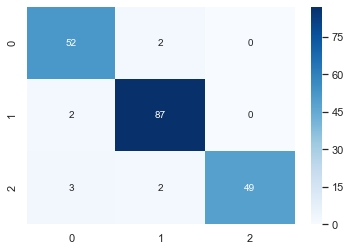

In [181]:
print('Classification report :',classification_report(y_val, grid_svm_predict))
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_val,grid_svm_predict), annot=True, cmap='Blues',fmt='g'))

###### The best hyperparamets for SVM-classifier using PCA is C = '0.5', kernel = RBF

In [192]:
SVM_best1 = SVC(kernel = 'rbf', C= 0.5, probability = True)

In [193]:
SVM_best1.fit(X_train,y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [194]:
SVM_best1.score(X_train, y_train)

0.9673202614379085

In [195]:
SVM_best_predict = SVM_best1.predict(X_val)

In [196]:
print(classification_report(y_val,SVM_best_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.96      0.98      0.97        89
           2       1.00      0.91      0.95        54

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


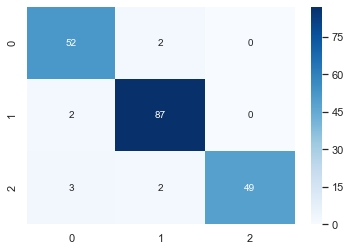

In [197]:
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_val,SVM_best_predict), annot=True, cmap='Blues',fmt='g'))

###### Testing on test set

In [198]:
SVM_best_predict1 = SVM_best1.predict(X_test)

In [199]:
print(classification_report(y_test,SVM_best_predict1))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        92
           2       0.97      0.97      0.97        30

    accuracy                           0.95       165
   macro avg       0.95      0.95      0.95       165
weighted avg       0.95      0.95      0.95       165



confusion matrix :  AxesSubplot(0.125,0.125;0.62x0.755)


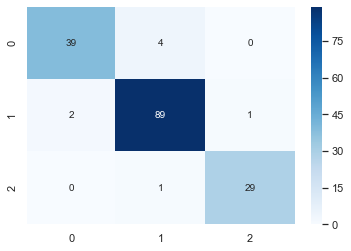

In [200]:
print('confusion matrix : ', sns.heatmap(confusion_matrix(y_test,SVM_best_predict1), annot=True, cmap='Blues',fmt='g'))

###### We could see slight improvement in the accuracy scores. Validation set is 95% and Test set is 95% but in training set it gives 96.73%. Also, we should use other metrics like ROC_FUP score, gini to evaluate the model.